<a href="https://colab.research.google.com/github/praza-kembaren/web/blob/main/KonjungsiOkultasi_Bulan_Planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan Impor Modul (load data DE)

In [ ]:
%%capture
pip install skyfield astroquery cartopy

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skyfield.api import load, wgs84
from datetime import datetime, timedelta
import matplotlib.text as mtext
import numpy as np

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 13

# Memuat skala waktu dan efemeris
ts = load.timescale()
eph = load('de440.bsp')

In [ ]:
obj = "SATURN"

# Pengecekan Rentang tahun tinggi

In [ ]:
# # Define objects
# earth = eph['Earth']
# planet = eph[f'{obj} BARYCENTER']
# moon = eph['Moon']
# sun = eph['Sun']

# # Rentang waktu
# start_date = datetime(2009, 2, 21)
# end_date = datetime(2009, 2, 25)
# days = (end_date - start_date).days
# angular_separation_limit = 5  # Ketat untuk okultasi 0.28361

# # List untuk menyimpan semua konjungsi
# all_conjunctions = []
# min_conjunctions = []
# processed_times = set()  # Untuk mencegah duplikasi
# current_episode = []
# episode_min = None

# # Lokasi pengamatan (Jakarta, matching Obs. Bosscha coordinates)
# observer = earth + wgs84.latlon(latitude_degrees=-6 - (49/60) - (50/3600), longitude_degrees=107 + (37/60), elevation_m=1310)

# # # Pemeriksaan konjungsi dan okultasi
# # current_date = start_date
# # for day in range(days):
# #     for hour in range(0, 24, 4):  # Periksa setiap 4 jam
# #         t = ts.utc(current_date.year, current_date.month, current_date.day, hour)
# #         astro_moon = observer.at(t).observe(moon)
# #         astro_planet = observer.at(t).observe(planet)
# #         separation = astro_moon.separation_from(astro_planet).degrees

# #         if separation < 1:  # Pemeriksaan awal
# #             for minute in range(0, 24 * 60, 1):  # Resolusi 1 menit
# #                 t_fine = ts.utc(current_date.year, current_date.month, current_date.day, 0, minute)
# #                 t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
# #                 if t_key in processed_times:
# #                     continue

# #                 astro_moon = observer.at(t_fine).observe(moon)
# #                 astro_planet = observer.at(t_fine).observe(planet)
# #                 sep = astro_moon.separation_from(astro_planet).degrees

# #                 if sep < angular_separation_limit:
# #                     alt_moon, _, _ = astro_moon.apparent().altaz()
# #                     alt_planet, _, _ = astro_planet.apparent().altaz()
# #                     astro_sun = observer.at(t_fine).observe(sun)
# #                     alt_sun, _, _ = astro_sun.apparent().altaz()

# #                     if alt_moon.degrees > 0 and alt_planet.degrees > 0:
# #                         ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
# #                         ra_planet, dec_planet = astro_planet.radec()[0].degrees, astro_planet.radec()[1].degrees
# #                         year = t_fine.utc_datetime().year
# #                         time_of_day = "Siang" if alt_sun.degrees > 0 else "Malam"
# #                         event = (t_fine.utc_datetime(), ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun.degrees)
# #                         all_conjunctions.append(event)
# #                         processed_times.add(t_key)
# #                         # Update current episode
# #                         if not current_episode or (t_fine.utc_datetime() - current_episode[-1][0]) < timedelta(hours=24):
# #                             current_episode.append(event)
# #                             if not episode_min or sep < episode_min[5]:
# #                                 episode_min = event
# #                         else:
# #                             # End of episode, save minimum
# #                             if episode_min:
# #                                 min_conjunctions.append(episode_min)
# #                             current_episode = [event]
# #                             episode_min = event

# #     current_date += timedelta(days=1)

# # # Save last episode's minimum
# # if episode_min:
# #     min_conjunctions.append(episode_min)

# # # Simpan hasil ke file teks pertama (semua konjungsi)
# # with open(f"DataOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
# #     f.write("Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA Venus (deg)\tDec Venus (deg)\tJarak Sudut (derajat)\tWaktu Hari\tCatatan\n")
# #     f.write("-" * 130 + "\n")
# #     for conj in sorted(all_conjunctions, key=lambda x: x[0]):
# #         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun = conj
# #         note = "*minimum" if any(t == m[0] for m in min_conjunctions) else ""
# #         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{note}\n")

# # # Simpan konjungsi minimum ke file teks kedua
# # with open(f"/content/drive/MyDrive/Proyek Risalah Astronomi/Data/MinOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
# #     f.write("Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA Venus (deg)\tDec Venus (deg)\tJarak Sudut (derajat)\tWaktu Hari\tCatatan\n")
# #     f.write("-" * 130 + "\n")
# #     for conj in sorted(min_conjunctions, key=lambda x: x[0]):
# #         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun = conj
# #         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t*minimum\n")

# # print(f"Ditemukan {len(all_conjunctions)} peristiwa konjungsi dengan separasi < {angular_separation_limit}° dari lokasi pengamatan.")
# # print(f"Ditemukan {len(min_conjunctions)} konjungsi minimum.")

# # Pemeriksaan konjungsi dan okultasi
# current_date = start_date
# for day in range(days):
#     for hour in range(0, 24, 4):  # Periksa setiap 4 jam
#         t = ts.utc(current_date.year, current_date.month, current_date.day, hour)
#         astro_moon = observer.at(t).observe(moon)
#         astro_planet = observer.at(t).observe(planet)
#         separation = astro_moon.separation_from(astro_planet).degrees

#         if separation < 1:  # Pemeriksaan awal
#             for minute in range(0, 24 * 60, 1):  # Resolusi 1 menit
#                 t_fine = ts.utc(current_date.year, current_date.month, current_date.day, 0, minute)
#                 t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
#                 if t_key in processed_times:
#                     continue

#                 astro_moon = observer.at(t_fine).observe(moon)
#                 astro_planet = observer.at(t_fine).observe(planet)
#                 sep = astro_moon.separation_from(astro_planet).degrees

#                 if sep < angular_separation_limit:
#                     alt_moon, _, _ = astro_moon.apparent().altaz()
#                     alt_planet, _, _ = astro_planet.apparent().altaz()
#                     astro_sun = observer.at(t_fine).observe(sun)
#                     alt_sun, _, _ = astro_sun.apparent().altaz()

#                     # Tentukan status ufuk untuk Bulan dan planet
#                     moon_horizon = "Di atas ufuk" if alt_moon.degrees > 0 else "Di bawah ufuk"
#                     planet_horizon = "Di atas ufuk" if alt_planet.degrees > 0 else "Di bawah ufuk"

#                     ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
#                     ra_planet, dec_planet = astro_planet.radec()[0].degrees, astro_planet.radec()[1].degrees
#                     year = t_fine.utc_datetime().year
#                     time_of_day = "Siang" if alt_sun.degrees > 0 else "Malam"
#                     event = (t_fine.utc_datetime(), ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun.degrees, moon_horizon, planet_horizon)
#                     all_conjunctions.append(event)
#                     processed_times.add(t_key)
#                     # Update current episode
#                     if not current_episode or (t_fine.utc_datetime() - current_episode[-1][0]) < timedelta(hours=24):
#                         current_episode.append(event)
#                         if not episode_min or sep < episode_min[5]:
#                             episode_min = event
#                     else:
#                         # End of episode, save minimum
#                         if episode_min:
#                             min_conjunctions.append(episode_min)
#                         current_episode = [event]
#                         episode_min = event

#     current_date += timedelta(days=1)

# # Save last episode's minimum
# if episode_min:
#     min_conjunctions.append(episode_min)

# # Simpan hasil ke file teks pertama (semua konjungsi)
# with open(f"DataOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
#     f.write("Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA Venus (deg)\tDec Venus (deg)\tJarak Sudut (derajat)\tWaktu Hari\tStatus Bulan\tStatus Planet\tCatatan\n")
#     f.write("-" * 150 + "\n")
#     for conj in sorted(all_conjunctions, key=lambda x: x[0]):
#         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun, moon_horizon, planet_horizon = conj
#         note = "*minimum" if any(t == m[0] for m in min_conjunctions) else ""
#         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{moon_horizon}\t{planet_horizon}\t{note}\n")

# # Simpan konjungsi minimum ke file teks kedua
# with open(f"MinOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
#     f.write("Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA Venus (deg)\tDec Venus (deg)\tJarak Sudut (derajat)\tWaktu Hari\tStatus Bulan\tStatus Planet\tCatatan\n")
#     f.write("-" * 150 + "\n")
#     for conj in sorted(min_conjunctions, key=lambda x: x[0]):
#         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun, moon_horizon, planet_horizon = conj
#         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{moon_horizon}\t{planet_horizon}\t*minimum\n")

# print(f"Ditemukan {len(all_conjunctions)} peristiwa konjungsi dengan separasi < {angular_separation_limit}° dari lokasi pengamatan.")
# print(f"Ditemukan {len(min_conjunctions)} konjungsi minimum.")

Ditemukan 693 peristiwa konjungsi dengan separasi < 5° dari lokasi pengamatan.
Ditemukan 1 konjungsi minimum.


In [ ]:
from datetime import datetime, timedelta
from skyfield.api import load, wgs84

# Load ephemeris and timescale (assumed to be defined)
earth = eph['Earth']
planet = eph[f'{obj} BARYCENTER']
moon = eph['Moon']
sun = eph['Sun']

# Rentang waktu
start_date = datetime(2024, 12, 8)
end_date = datetime(2024, 12, 9)
days = (end_date - start_date).days + 1  # Include end date
angular_separation_limit = 5  # Moon's angular radius for occultation

# List untuk menyimpan semua konjungsi
all_conjunctions = []
min_conjunctions = []
processed_times = set()  # Untuk mencegah duplikasi
current_episode = []
episode_min = None

# Lokasi pengamatan (Jakarta, matching Obs. Bosscha coordinates)
observer = earth + wgs84.latlon(latitude_degrees=-6 - (49/60) - (50/3600), longitude_degrees=107 + (37/60), elevation_m=1310)

# Pemeriksaan konjungsi dan okultasi
current_date = start_date - timedelta(days=1)  # Start one day earlier to catch late events
for day in range(days + 1):  # Include extra day for overlap
    for hour in range(0, 24, 4):  # Periksa setiap 4 jam
        t = ts.utc(current_date.year, current_date.month, current_date.day, hour)
        astro_moon = observer.at(t).observe(moon)
        astro_planet = observer.at(t).observe(planet)
        separation = astro_moon.separation_from(astro_planet).degrees

        if separation < 1:  # Pemeriksaan awal
            # Check from 4 hours before to 4 hours after the coarse time
            start_time = t.utc_datetime() - timedelta(hours=4)
            end_time = t.utc_datetime() + timedelta(hours=4)
            current_time = start_time
            while current_time < end_time:
                t_fine = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute)
                t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
                if t_key in processed_times:
                    current_time += timedelta(minutes=1)
                    continue

                astro_moon = observer.at(t_fine).observe(moon)
                astro_planet = observer.at(t_fine).observe(planet)
                sep = astro_moon.separation_from(astro_planet).degrees

                if sep < angular_separation_limit:
                    alt_moon, _, _ = astro_moon.apparent().altaz()
                    alt_planet, _, _ = astro_planet.apparent().altaz()
                    astro_sun = observer.at(t_fine).observe(sun)
                    alt_sun, _, _ = astro_sun.apparent().altaz()

                    # Tentukan status ufuk untuk Bulan dan planet
                    moon_horizon = "Di atas ufuk" if alt_moon.degrees > 0 else "Di bawah ufuk"
                    planet_horizon = "Di atas ufuk" if alt_planet.degrees > 0 else "Di bawah ufuk"

                    ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                    ra_planet, dec_planet = astro_planet.radec()[0].degrees, astro_planet.radec()[1].degrees
                    year = t_fine.utc_datetime().year
                    time_of_day = "Siang" if alt_sun.degrees > 0 else "Malam"
                    event = (t_fine.utc_datetime(), ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun.degrees, moon_horizon, planet_horizon)
                    all_conjunctions.append(event)
                    processed_times.add(t_key)

                    # Update current episode
                    if not current_episode or (t_fine.utc_datetime() - current_episode[-1][0]) <= timedelta(minutes=60):  # Group within 1 hour
                        current_episode.append(event)
                        if not episode_min or sep < episode_min[5]:
                            episode_min = event
                    else:
                        # End of episode, save minimum if observable
                        if episode_min and (episode_min[9] == "Di atas ufuk" or any(e[9] == "Di atas ufuk" for e in current_episode)):
                            min_conjunctions.append(episode_min)
                        current_episode = [event]
                        episode_min = event

                current_time += timedelta(minutes=1)

    current_date += timedelta(days=1)

# Save last episode's minimum if observable
if episode_min and (episode_min[9] == "Di atas ufuk" or any(e[9] == "Di atas ufuk" for e in current_episode)):
    min_conjunctions.append(episode_min)

# # Simpan hasil ke file teks pertama (semua konjungsi)
# with open(f"DataOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
#     f.write(f"Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA {obj} (deg)\tDec {obj} (deg)\tJarak Sudut (derajat)\tWaktu Hari\tStatus Bulan\tStatus Planet\tCatatan\n")
#     f.write("-" * 150 + "\n")
#     for conj in sorted(all_conjunctions, key=lambda x: x[0]):
#         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun, moon_horizon, planet_horizon = conj
#         note = "*minimum" if any(t == m[0] for m in min_conjunctions) else ""
#         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{moon_horizon}\t{planet_horizon}\t{note}\n")

# Simpan konjungsi minimum ke file teks kedua
with open(f"MinOkultasi{obj}{end_date.strftime('%Y')}.txt", "w") as f:
    f.write(f"Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA {obj} (deg)\tDec {obj} (deg)\tJarak Sudut (derajat)\tWaktu Hari\tStatus Bulan\tStatus Planet\tCatatan\n")
    f.write("-" * 150 + "\n")
    for conj in sorted(min_conjunctions, key=lambda x: x[0]):
        t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun, moon_horizon, planet_horizon = conj
        f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{moon_horizon}\t{planet_horizon}\t*minimum\n")

print(f"Ditemukan {len(all_conjunctions)} peristiwa konjungsi dengan separasi < {angular_separation_limit}° dari lokasi pengamatan.")
print(f"Ditemukan {len(min_conjunctions)} konjungsi minimum.")

Ditemukan 480 peristiwa konjungsi dengan separasi < 5° dari lokasi pengamatan.
Ditemukan 1 konjungsi minimum.


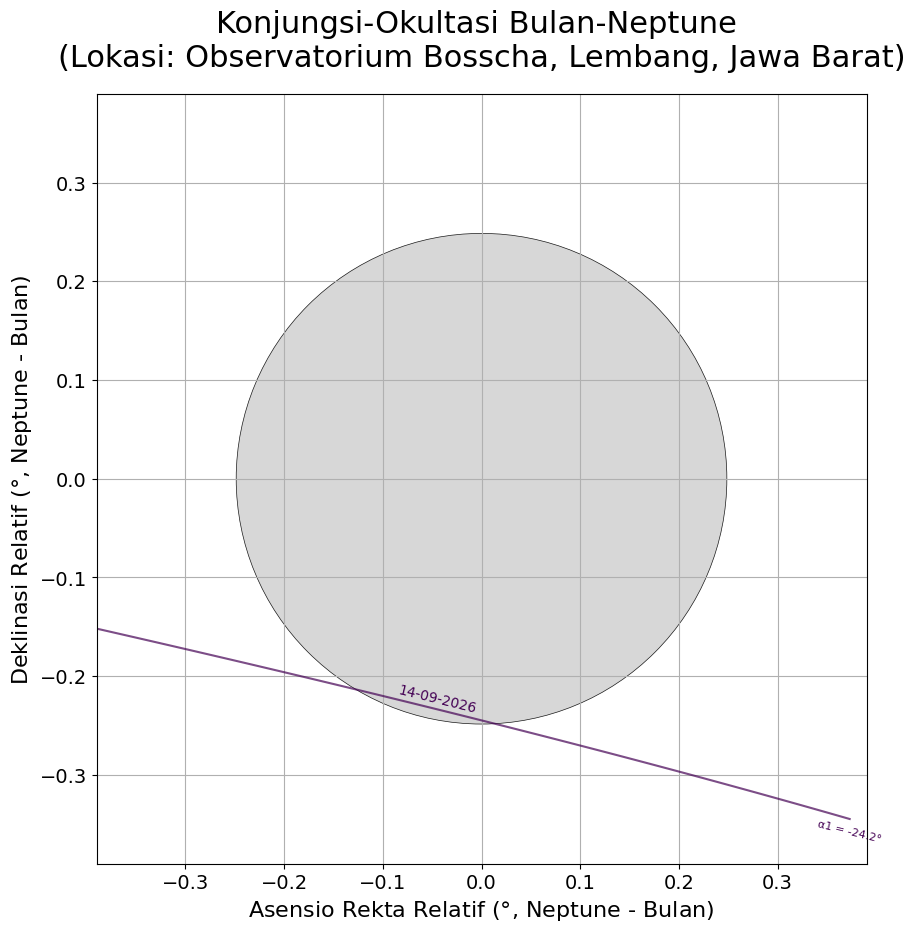

In [ ]:
# Plot lingkaran Bulan dan posisi relatif planet
fig, ax = plt.subplots(figsize=(10, 10))
moon_radius = (0+(29/60)+(49.3/3600))/2  # Radius sudut Bulan ~0.52 derajat / 2
circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9, label='Moon')
ax.add_patch(circle)

# Grupkan konjungsi berdasarkan tahun
years = sorted(set(conj[6] for conj in all_conjunctions))
# Gunakan colormap viridis untuk warna unik per tahun
cmap = plt.get_cmap('inferno')
colors = [cmap(i / len(years)) for i in range(len(years))]

# Grupkan konjungsi berdasarkan tahun dan pisahkan event
years = sorted(set(conj[6] for conj in all_conjunctions))
event_groups = []
for year in years:
    year_conjs = sorted([conj for conj in all_conjunctions if conj[6] == year], key=lambda x: x[0])
    events = []
    current_event = [year_conjs[0]]
    for i in range(1, len(year_conjs)):
        time_diff = (year_conjs[i][0] - year_conjs[i-1][0]).total_seconds()
        if time_diff > 21600:  # 6 jam = 21,600 detik
            events.append(current_event)
            current_event = [year_conjs[i]]
        else:
            current_event.append(year_conjs[i])
    events.append(current_event)
    event_groups.append((year, events))

# Hitung total event untuk colormap
total_events = sum(len(events) for _, events in event_groups)
cmap = plt.get_cmap('viridis')
colors = [cmap(i / total_events) for i in range(total_events)]
color_index = 0

for year, events in event_groups:
    for event_index, event_conjs in enumerate(events):
        # Hitung posisi relatif (RA planet - RA Bulan, Dec planet - Dec Bulan)
        positions = [(conj[3] - conj[1], conj[4] - conj[2], conj[8]) for conj in event_conjs]

        if positions:
            x_rel, y_rel, sun_alts = zip(*positions)
            # Plot garis untuk lintasan posisi relatif dengan warna dari colormap
            line, = ax.plot(x_rel, y_rel, color=colors[color_index], alpha=0.7,
                           label=f'Tahun {year}' if year == years[0] and event_index == 0 else "")
            color_index += 1

        if event_conjs:
            # Anotasi tanggal pada titik tengah
            mid_index = len(event_conjs) // 2
            mid_conj = event_conjs[mid_index]
            x_mid = mid_conj[3] - mid_conj[1]
            y_mid = mid_conj[4] - mid_conj[2]
            date_str = mid_conj[0].strftime('%d-%m-%Y')

            # Hitung kemiringan untuk orientasi anotasi
            rotation = 0
            if len(positions) >= 2 and mid_index > 0:
                x1, y1, _ = positions[mid_index - 1]
                x2, y2, _ = positions[mid_index]
                if x2 != x1:  # Hindari pembagian oleh nol
                    slope = (y2 - y1) / (x2 - x1)
                    rotation = np.arctan(slope) * 180 / np.pi
                else:
                    rotation = 90

            ax.annotate(date_str, (x_mid, y_mid+0.01), fontsize=10, ha='center', va='center',
                       color=colors[color_index-1], rotation=rotation)

            # Anotasi ketinggian Matahari pada titik pertama
            first_conj = event_conjs[0]
            x_first = first_conj[3] - first_conj[1]
            y_first = first_conj[4] - first_conj[2]
            alt_first = first_conj[8]
            ax.annotate(f'α1 = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
                       ha='center', va='top', color=colors[color_index-1], rotation=rotation)

            # Anotasi ketinggian Matahari pada titik terakhir
            last_conj = event_conjs[-1]
            x_last = last_conj[3] - last_conj[1]
            y_last = last_conj[4] - last_conj[2]
            alt_last = last_conj[8]
            ax.annotate(f'α2 = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
                       ha='center', va='bottom', color=colors[color_index-1], rotation=rotation)

ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_ylabel(f'Deklinasi Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_title(f'Konjungsi-Okultasi Bulan-{obj.capitalize()} \n(Lokasi: Observatorium Bosscha, Lembang, Jawa Barat)', pad=20)
ax.grid(True)

ax.set_aspect('equal')
ax.set_xlim(-0.39, .39)
ax.set_ylim(-.39, .39)

# Simpan plot
plt.savefig(f"Konjungi{obj.capitalize()}{start_date.strftime('%Y')}-{end_date.strftime('%Y')}.png")

# Pengecekan satu kejadian satu lokasi

In [ ]:
from datetime import datetime, timedelta
from skyfield.api import load, wgs84
import uuid



# Define objects
earth = eph['Earth']
planet = eph['VENUS']
moon = eph['Moon']
sun = eph['Sun']

# Time range
start_date = datetime(2026, 9, 14)
end_date = datetime(2026, 9, 15)
days = (end_date - start_date).days
angular_separation_limit = 0.5  # Tight for occultation

# Lists and sets for conjunctions
all_conjunctions = []
min_conjunctions = {}
processed_times = set()

# Observation location (Jakarta)
observer = earth + wgs84.latlon(latitude_degrees=(-6 - (49/60) - (50/3600)), longitude_degrees=(107 + (37/60) + (0/3600)), elevation_m=1310)

# Check for conjunctions and occultations
for day in range(days):
    for hour in range(0, 24, 4):  # Check every 4 hours
        t = ts.utc(start_date.year, start_date.month, start_date.day, hour)
        astro_moon = observer.at(t).observe(moon)
        astro_planet = observer.at(t).observe(planet)
        separation = astro_moon.separation_from(astro_planet).degrees

        if separation < 1:  # Initial check
            for minute in range(0, 24 * 60, 1):  # 1-minute resolution
                t_fine = ts.utc(start_date.year, start_date.month, start_date.day, 0, minute)
                t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
                if t_key in processed_times:
                    continue

                astro_moon = observer.at(t_fine).observe(moon)
                astro_planet = observer.at(t_fine).observe(planet)
                sep = astro_moon.separation_from(astro_planet).degrees

                if sep < angular_separation_limit:
                    # Get Sun altitude
                    astro_sun = observer.at(t_fine).observe(sun)
                    alt_sun, _, _ = astro_sun.apparent().altaz()

                    # Record conjunction
                    ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                    ra_planet, dec_planet = astro_planet.radec()[0].degrees, astro_planet.radec()[1].degrees
                    year = t_fine.utc_datetime().year
                    time_of_day = "Day" if alt_sun.degrees > 0 else "Night"
                    all_conjunctions.append((t_fine.utc_datetime(), ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun.degrees))
                    processed_times.add(t_key)
                    if year not in min_conjunctions or sep < min_conjunctions[year][5]:
                        min_conjunctions[year] = (t_fine.utc_datetime(), ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun.degrees)

    start_date += timedelta(days=1)

# # Save results to text file
# with open(f"DataKonjungiMerkurius{start_date.strftime('%Y')}-{end_date.strftime('%Y')}.txt", "w") as f:
#     f.write("Tanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA planet (deg)\tDec planet (deg)\tJarak Sudut (derajat)\tWaktu Hari\tSun Alt (deg)\n")
#     f.write("-" * 150 + "\n")
#     for conj in sorted(all_conjunctions, key=lambda x: x[0]):
#         t, ra_moon, dec_moon, ra_planet, dec_planet, sep, year, time_of_day, alt_sun = conj
#         note = "*minimum" if (year in min_conjunctions and t == min_conjunctions[year][0]) else ""
#         f.write(f"{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_planet:.3f}\t{dec_planet:.3f}\t{sep:.3f}\t{time_of_day}\t{alt_sun:.1f}\t{note}\n")

# Summary
print(f"Found {len(all_conjunctions)} conjunction events with separation < {angular_separation_limit}° from the observation location.")

Found 108 conjunction events with separation < 0.5° from the observation location.


(-0.59, 0.59)

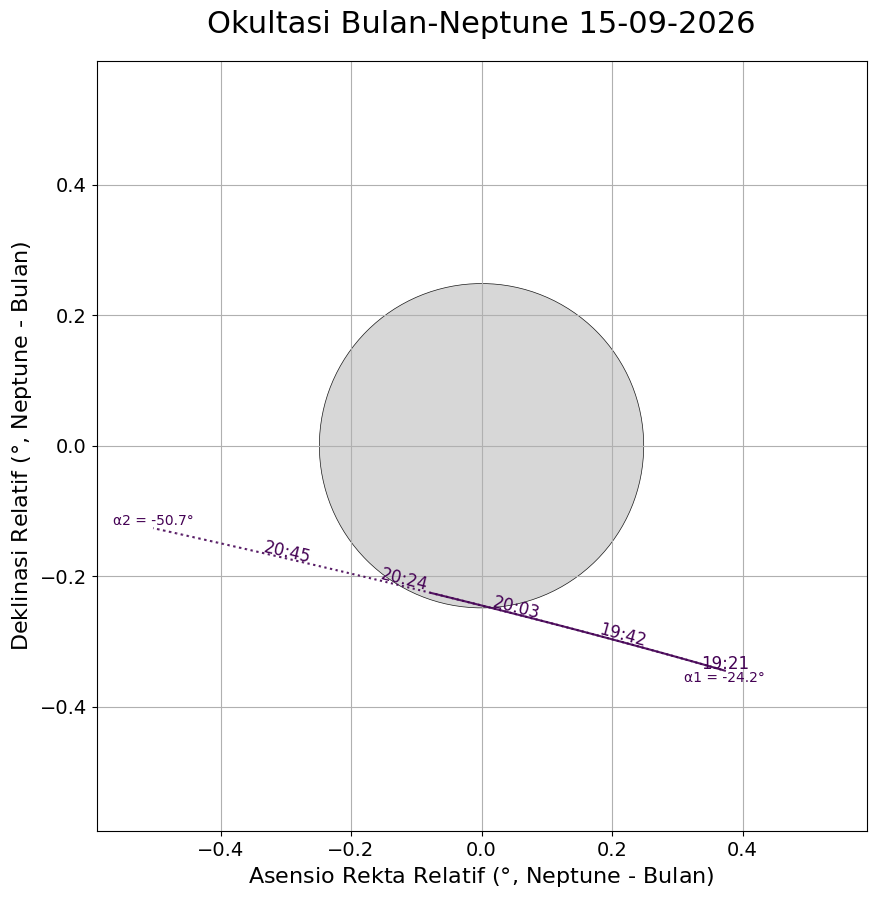

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
moon_radius = (0 + (29/60) + (49.3/3600)) / 2  # Moon angular radius ~0.52 degrees / 2
circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9, label='Moon')
ax.add_patch(circle)

# Group conjunctions by year and separate events
years = sorted(set(conj[6] for conj in all_conjunctions))
event_groups = []
for year in years:
    year_conjs = sorted([conj for conj in all_conjunctions if conj[6] == year], key=lambda x: x[0])
    events = []
    current_event = [year_conjs[0]]
    for i in range(1, len(year_conjs)):
        time_diff = (year_conjs[i][0] - year_conjs[i-1][0]).total_seconds()
        if time_diff > 21600:  # 6 hours = 21,600 seconds
            events.append(current_event)
            current_event = [year_conjs[i]]
        else:
            current_event.append(year_conjs[i])
    events.append(current_event)
    event_groups.append((year, events))

# Select the first event for plotting (single Mercury occultation)
year, events = event_groups[0]  # Take the first year
event_conjs = events[0]  # Take the first event

# Calculate Moon altitudes and relative positions
positions = []
moon_altitudes = []
for conj in event_conjs:
    t_fine = ts.utc(conj[0])  # Convert datetime to Skyfield time
    astro_moon = observer.at(t_fine).observe(moon)
    alt_moon, _, _ = astro_moon.apparent().altaz()
    x_rel = conj[3] - conj[1]  # RA Mercury - RA Moon
    y_rel = conj[4] - conj[2]  # Dec Mercury - Dec Moon
    positions.append((x_rel, y_rel, conj[8]))  # conj[8] is Sun altitude
    moon_altitudes.append(alt_moon.degrees)

# Plot trajectory with solid/dashed lines based on Moon altitude
color = 'blue'  # Single color for the event
for i in range(len(positions) - 1):
    x_seg = [positions[i][0], positions[i+1][0]]
    y_seg = [positions[i][1], positions[i+1][1]]
    # Determine linestyle: solid if Moon is above horizon, dashed if below
    linestyle = '-' if moon_altitudes[i] > 0 else ':'
    ax.plot(x_seg, y_seg, color=colors[color_index-1], linestyle=linestyle, alpha=0.9)

# Annotations
n_points = len(event_conjs)
step = max(1, n_points // 5)  # Aim for ~5 annotations
annotation_indices = list(range(0, n_points, step))[:5]

for idx in annotation_indices:
    conj = event_conjs[idx]
    x_mid = conj[3] - conj[1]
    y_mid = conj[4] - conj[2]
    # Convert UTC to WIB (UTC+7)
    wib_time = conj[0] + timedelta(hours=7)
    date_str = wib_time.strftime('%H:%M')

    # Calculate slope for annotation rotation
    rotation = 0
    if idx > 0 and idx < len(positions):
        x1, y1, _ = positions[idx - 1]
        x2, y2, _ = positions[idx]
        if x2 != x1:  # Avoid division by zero
            slope = (y2 - y1) / (x2 - x1)
            rotation = np.arctan(slope) * 180 / np.pi
        else:
            rotation = 90

    ax.annotate(date_str, (x_mid, y_mid + 0.01), fontsize=12, ha='center', va='center',
                color=colors[color_index-1], rotation=rotation)

# Annotate Sun altitude at first and last points
first_conj = event_conjs[0]
x_first = first_conj[3] - first_conj[1]
y_first = first_conj[4] - first_conj[2]
alt_first = first_conj[8]
ax.annotate(f'α1 = {alt_first:.1f}°', (x_first, y_first), fontsize=10,
            ha='center', va='top', color=colors[color_index-1])

last_conj = event_conjs[-1]
x_last = last_conj[3] - last_conj[1]
y_last = last_conj[4] - last_conj[2]
alt_last = last_conj[8]
ax.annotate(f'α2 = {alt_last:.1f}°', (x_last, y_last), fontsize=10,
            ha='center', va='bottom', color=colors[color_index-1])

ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_ylabel(f'Deklinasi Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_title(f"Okultasi Bulan-{obj.capitalize()} {start_date.strftime('%d-%m-%Y')}", pad=20)
ax.grid(True)
# ax.legend(['Moon', 'Above Horizon', 'Below Horizon'], loc='upper right')
ax.set_aspect('equal')
ax.set_xlim(-0.59, 0.59)
ax.set_ylim(-0.59, 0.59)

# # Save plot
# plt.savefig(f"Konjungi{obj.capitalize()}{year}.png")
# plt.show()

# Pengecekan satu kejadian

In [ ]:
from datetime import datetime, timedelta
from skyfield.api import load, wgs84
import matplotlib.pyplot as plt
import numpy as np

# Observatory data
observatories = [
    {
        "name": "Observatorium Bosscha",
        "latitude": -6.8231,
        "longitude": 107.6175,
        "elevation_m": 1310,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Nasional Timau",
        "latitude": -9.5880,
        "longitude": 124.1086,
        "elevation_m": 1300,
        "utc_offset": 8
    },
    {
        "name": "Observatorium Astronomi ITERA Lampung",
        "latitude": -5.3586,
        "longitude": 105.3142,
        "elevation_m": 124,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Ilmu Falak UM Sumatera Utara",
        "latitude": 3.5754,
        "longitude": 98.6570,
        "elevation_m": 30,
        "utc_offset": 7
    }
]


# Define objects
earth = eph['Earth']
mercury = eph['VENUS']  # Using MERCURY instead of BARYCENTER for precision
moon = eph['Moon']
sun = eph['Sun']

# Time range
start_date = datetime(2051, 10, 6)
end_date = datetime(2051, 10, 7)
days = (end_date - start_date).days
angular_separation_limit = 0.3  # Tight for occultation

# Function to compute conjunctions for an observatory
def compute_conjunctions(observer, start_date, days):
    all_conjunctions = []
    processed_times = set()
    for day in range(days):
        for hour in range(0, 24, 4):  # Check every 4 hours
            t = ts.utc(start_date.year, start_date.month, start_date.day + day, hour)
            astro_moon = observer.at(t).observe(moon)
            astro_mercury = observer.at(t).observe(mercury)
            separation = astro_moon.separation_from(astro_mercury).degrees
            if separation < 1:  # Initial check
                for minute in range(0, 24 * 60, 1):  # 1-minute resolution
                    t_fine = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
                    t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
                    if t_key in processed_times:
                        continue
                    astro_moon = observer.at(t_fine).observe(moon)
                    astro_mercury = observer.at(t_fine).observe(mercury)
                    sep = astro_moon.separation_from(astro_mercury).degrees
                    if sep < angular_separation_limit:
                        astro_sun = observer.at(t_fine).observe(sun)
                        alt_sun, _, _ = astro_sun.apparent().altaz()
                        alt_moon, _, _ = astro_moon.apparent().altaz()
                        ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                        ra_mercury, dec_mercury = astro_mercury.radec()[0].degrees, astro_mercury.radec()[1].degrees
                        all_conjunctions.append((t_fine.utc_datetime(), ra_moon, dec_moon, ra_mercury, dec_mercury, sep, alt_moon.degrees, alt_sun.degrees))
                        processed_times.add(t_key)
    return all_conjunctions

# Compute conjunctions for each observatory
obs_conjunctions = {}
for obs in observatories:
    observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
    conj = compute_conjunctions(observer, start_date, days)
    obs_conjunctions[obs['name']] = conj
    print(f"Found {len(conj)} conjunction events for {obs['name']} with separation < {angular_separation_limit}°")

# Select the first event (assumed same event across observatories)
event_conjunctions = {}
for name, conj in obs_conjunctions.items():
    if not conj:
        continue
    sorted_conj = sorted(conj, key=lambda x: x[0])
    events = []
    current_event = [sorted_conj[0]]
    for i in range(1, len(sorted_conj)):
        time_diff = (sorted_conj[i][0] - sorted_conj[i-1][0]).total_seconds()
        if time_diff > 21600:  # 6 hours
            events.append(current_event)
            current_event = [sorted_conj[i]]
        else:
            current_event.append(sorted_conj[i])
    events.append(current_event)
    event_conjunctions[name] = events[0]  # Take first event



Found 71 conjunction events for Observatorium Bosscha with separation < 0.3°


KeyboardInterrupt: 

<ipython-input-6-c8106dc04fc7>:81: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 4
  legend = ax.legend(handles=legend_handles, labels=[obs['name'] for obs in observatories],


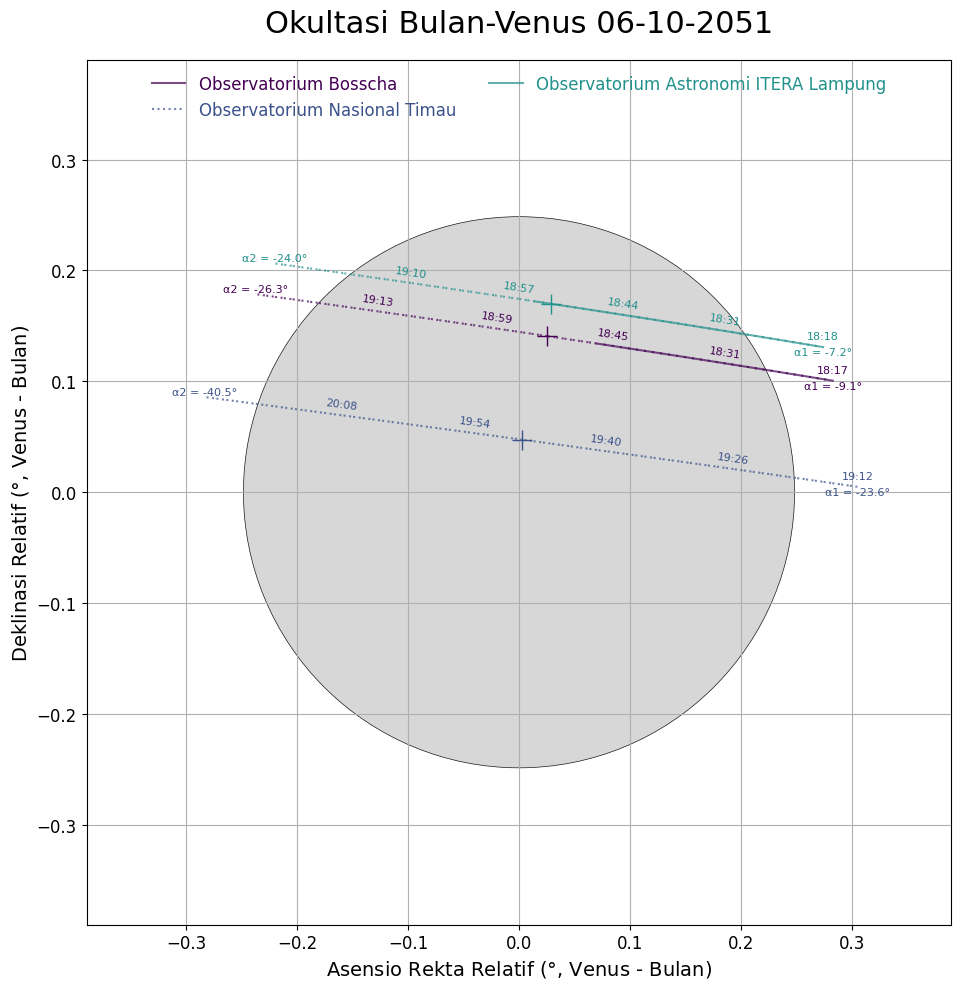

In [ ]:
import matplotlib.text as mtext
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
moon_radius = (0 + (29/60) + (49.3/3600)) / 2
circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9)
ax.add_patch(circle)

# Colors for observatories
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(observatories)) for i in range(len(observatories))]

# Plot trajectories
legend_handles = []
legend_labels = []
for idx, (obs_name, conj) in enumerate(event_conjunctions.items()):
    if not conj:
        continue
    # Calculate relative positions and altitudes
    positions = [(c[3] - c[1], c[4] - c[2], c[7], c[6]) for c in conj]
    # Plot segments
    for i in range(len(positions) - 1):
        x_seg = [positions[i][0], positions[i+1][0]]
        y_seg = [positions[i][1], positions[i+1][1]]
        linestyle = '-' if positions[i][3] > 0 else ':'
        line, = ax.plot(x_seg, y_seg, color=colors[idx], linestyle=linestyle, alpha=0.7)
        if i == 0:
            legend_handles.append(line)
            # Create colored text for legend
            colored_text = mtext.Text(0, 0, obs_name, color=colors[idx])
            legend_labels.append(colored_text)

    # Plot peak marker
    min_sep_idx = min(range(len(conj)), key=lambda i: conj[i][5])
    peak_pos = positions[min_sep_idx]
    ax.plot(peak_pos[0], peak_pos[1], marker='+', color=colors[idx], markersize=15)

    # Time and Sun altitude annotations
    n_points = len(conj)
    step = max(1, n_points // 5)
    annotation_indices = list(range(0, n_points, step))[:5]
    utc_offset = next(obs['utc_offset'] for obs in observatories if obs['name'] == obs_name)
    for i in annotation_indices:
        c = conj[i]
        x_rel = c[3] - c[1]
        y_rel = c[4] - c[2]
        local_time = c[0] + timedelta(hours=utc_offset)
        date_str = local_time.strftime('%H:%M')
        rotation = 0
        if i > 0 and i < len(positions):
            x1, y1 = positions[i - 1][0], positions[i - 1][1]
            x2, y2 = positions[i][0], positions[i][1]
            if x2 != x1:
                slope = (y2 - y1) / (x2 - x1)
                rotation = np.arctan(slope) * 180 / np.pi
            else:
                rotation = 90
        ax.annotate(date_str, (x_rel, y_rel + 0.01), fontsize=8, ha='center', va='center',
                    color=colors[idx], rotation=rotation)

    # Sun altitude at start and end
    c_first = conj[0]
    x_first = c_first[3] - c_first[1]
    y_first = c_first[4] - c_first[2]
    alt_first = c_first[7]
    ax.annotate(f'α1 = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
                ha='center', va='top', color=colors[idx])
    c_last = conj[-1]
    x_last = c_last[3] - c_last[1]
    y_last = c_last[4] - c_last[2]
    alt_last = c_last[7]
    ax.annotate(f'α2 = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
                ha='center', va='bottom', color=colors[idx])

# Plot settings
obj = "Venus"
ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_ylabel(f'Deklinasi Relatif ($\degree$, {obj.capitalize()} - Bulan)')
ax.set_title(f"Okultasi Bulan-{obj.capitalize()} {start_date.strftime('%d-%m-%Y')}", pad=20)
ax.grid(True)
# Legend below title
legend = ax.legend(handles=legend_handles, labels=[obs['name'] for obs in observatories],
                  handlelength=2, prop={'size': 12}, ncol=2, loc='upper center',
                  bbox_to_anchor=(0.5, 1.0), frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_color(color)
ax.set_aspect('equal')
ax.set_xlim(-0.39, 0.39)
ax.set_ylim(-0.39, 0.39)

# Adjust layout to prevent clipping
plt.tight_layout()

# # Save plot
plt.savefig('Konjungivenus2026_4Observatories.png')
# plt.show()

# Plotting per kejadian

In [ ]:
# Observatory data
observatories = [
    {
        "name": "Observatorium Bosscha",
        "latitude": -6.8231,
        "longitude": 107.6175,
        "elevation_m": 1310,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Nasional Timau",
        "latitude": -9.5880,
        "longitude": 124.1086,
        "elevation_m": 1300,
        "utc_offset": 8
    },
    {
        "name": "Observatorium Astronomi ITERA Lampung",
        "latitude": -5.3586,
        "longitude": 105.3142,
        "elevation_m": 124,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Ilmu Falak UMSU",
        "latitude": 3.5754,
        "longitude": 98.6570,
        "elevation_m": 30,
        "utc_offset": 7
    }
]

# Define objects
earth = eph['Earth']
mercury = eph['NEPTUNE BARYCENTER']
moon = eph['Moon']
sun = eph['Sun']

from datetime import datetime

dates = [
    datetime(2034, 2, 22),
    datetime(2034, 6, 12),
    datetime(2040, 8, 27),
    datetime(2040, 10, 20),
    datetime(2041, 1, 10),
    datetime(2041, 3, 6),
    datetime(2050, 10, 31),
    datetime(2051, 4, 13),
    datetime(2057, 6, 2),
    datetime(2057, 7, 26),
    datetime(2067, 5, 16),
    datetime(2067, 7, 10),
    datetime(2067, 9, 2),
    datetime(2074, 7, 23),
    datetime(2074, 9, 16),
    datetime(2083, 7, 16),
    datetime(2083, 9, 9),
    datetime(2083, 11, 2),
    datetime(2091, 12, 3),
    datetime(2092, 2, 22),
    datetime(2099, 9, 14),
    datetime(2100, 1, 1),
]



# Parameters
angular_separation_limit = 0.35  # To capture conjunctions
moon_radius = (0 + 29/60 + 49.3/3600) / 2  # ≈ 0.497583°

# Function to compute conjunctions
def compute_conjunctions(observer, start_date, days=1):
    all_conjunctions = []
    processed_times = set()
    for day in range(days):
        for minute in range(0, 24 * 60, 1):  # 1-minute resolution
            t = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
            t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
            if t_key in processed_times:
                continue
            astro_moon = observer.at(t).observe(moon)
            astro_mercury = observer.at(t).observe(mercury)
            sep = astro_moon.separation_from(astro_mercury).degrees
            if sep < angular_separation_limit:
                astro_sun = observer.at(t).observe(sun)
                alt_sun, _, _ = astro_sun.apparent().altaz()
                alt_moon, _, _ = astro_moon.apparent().altaz()
                ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                ra_mercury, dec_mercury = astro_mercury.radec()[0].degrees, astro_mercury.radec()[1].degrees
                all_conjunctions.append((t.utc_datetime(), ra_moon, dec_moon, ra_mercury, dec_mercury, sep, alt_moon.degrees, alt_sun.degrees))
                processed_times.add(t_key)
    return sorted(all_conjunctions, key=lambda x: x[0])

# Process each date
for date in dates:
    event_conjunctions = {}
    # Compute conjunctions for each observatory
    for obs in observatories:
        observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
        conj = compute_conjunctions(observer, date)
        event_conjunctions[obs['name']] = conj
        print(f"Found {len(conj)} conjunction events for {obs['name']} on {date.strftime('%Y-%m-%d')}")

    # Save conjunction data to a file
    with open(f'mercury_moon_conjunctions_{date.strftime("%Y%m%d")}.txt', 'w') as f:
        f.write("Observatorium\tTanggal (UTC)\tWaktu (UTC)\tRA Moon (deg)\tDec Moon (deg)\tRA Mercury (deg)\tDec Mercury (deg)\tSeparation (deg)\tAlt Moon (deg)\tAlt Sun (deg)\n")
        f.write("-" * 150 + "\n")
        for obs in observatories:
            conj = event_conjunctions.get(obs['name'], [])
            if not conj:
                f.write(f"{obs['name']}\tNo conjunction detected\t-\t-\t-\t-\t-\t-\t-\t-\n")
                continue
            for c in conj:
                t, ra_moon, dec_moon, ra_mercury, dec_mercury, sep, alt_moon, alt_sun = c
                f.write(f"{obs['name']}\t{t.strftime('%Y-%m-%d')}\t{t.strftime('%H:%M:%S')}\t{ra_moon:.3f}\t{dec_moon:.3f}\t{ra_mercury:.3f}\t{dec_mercury:.3f}\t{sep:.3f}\t{alt_moon:.2f}\t{alt_sun:.2f}\n")

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10))
    circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9)
    ax.add_patch(circle)

    # Colors for observatories
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / len(observatories)) for i in range(len(observatories))]

    # Plot trajectories
    legend_handles = []
    legend_labels = []
    for idx, (obs_name, conj) in enumerate(event_conjunctions.items()):
        if not conj:
            continue
        # Calculate relative positions and altitudes
        positions = [(c[3] - c[1], c[4] - c[2], c[7], c[6]) for c in conj]
        # Plot segments
        for i in range(len(positions) - 1):
            x_seg = [positions[i][0], positions[i+1][0]]
            y_seg = [positions[i][1], positions[i+1][1]]
            linestyle = '-' if positions[i][3] > 0 else ':'
            line, = ax.plot(x_seg, y_seg, color=colors[idx], linestyle=linestyle, alpha=0.7)
            if i == 0:
                legend_handles.append(line)
                colored_text = mtext.Text(0, 0, obs_name, color=colors[idx])
                legend_labels.append(colored_text)

        # Plot peak marker
        min_sep_idx = min(range(len(conj)), key=lambda i: conj[i][5])
        peak_pos = positions[min_sep_idx]
        ax.plot(peak_pos[0], peak_pos[1], marker='+', color=colors[idx], markersize=15)

        # Time and Sun altitude annotations
        n_points = len(conj)
        step = max(1, n_points // 5)
        annotation_indices = list(range(0, n_points, step))[:5]
        utc_offset = next(obs['utc_offset'] for obs in observatories if obs['name'] == obs_name)
        for i in annotation_indices:
            c = conj[i]
            x_rel = c[3] - c[1]
            y_rel = c[4] - c[2]
            local_time = c[0] + timedelta(hours=utc_offset)
            date_str = local_time.strftime('%H:%M')
            rotation = 0
            if i > 0 and i < len(positions):
                x1, y1 = positions[i - 1][0], positions[i - 1][1]
                x2, y2 = positions[i][0], positions[i][1]
                if x2 != x1:
                    slope = (y2 - y1) / (x2 - x1)
                    rotation = np.arctan(slope) * 180 / np.pi
                else:
                    rotation = 90
            ax.annotate(date_str, (x_rel, y_rel + 0.01), fontsize=8, ha='center', va='center',
                        color=colors[idx], rotation=rotation)

        # Sun altitude at start and end
        c_first = conj[0]
        x_first = c_first[3] - c_first[1]
        y_first = c_first[4] - c_first[2]
        alt_first = c_first[7]
        ax.annotate(f'α1 = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
                    ha='center', va='top', color=colors[idx])
        c_last = conj[-1]
        x_last = c_last[3] - c_last[1]
        y_last = c_last[4] - c_last[2]
        alt_last = c_last[7]
        ax.annotate(f'α2 = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
                    ha='center', va='bottom', color=colors[idx])

    # Plot settings
    obj = "Neptunus"
    ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, {obj.capitalize()} - Bulan)')
    ax.set_ylabel(f'Deklinasi Relatif ($\degree$, {obj.capitalize()} - Bulan)')
    ax.set_title(f"Konjungsi-Okultasi Bulan-{obj.capitalize()} \n{date.strftime('%d-%m-%Y')}", pad=20)
    ax.grid(True)
    # Legend below title
    legend = ax.legend(handles=legend_handles, labels=[obs['name'] for obs in observatories if event_conjunctions[obs['name']]],
                      handlelength=2, prop={'size': 12}, ncol=2, loc='upper center',
                      bbox_to_anchor=(0.5, 1.0), frameon=False)
    for text, color in zip(legend.get_texts(), colors[:len(legend_handles)]):
        text.set_color(color)
    ax.set_aspect('equal')
    ax.set_xlim(-0.39, 0.39)
    ax.set_ylim(-0.39, 0.39)

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.savefig(f'KonjungiMerkurius_{date.strftime("%Y%m%d")}.png')
    plt.close()

print("Processing complete. Check output files and plots.")

Found 68 conjunction events for Observatorium Bosscha on 2034-02-22
Found 0 conjunction events for Observatorium Nasional Timau on 2034-02-22
Found 76 conjunction events for Observatorium Astronomi ITERA Lampung on 2034-02-22
Found 92 conjunction events for Observatorium Ilmu Falak UMSU on 2034-02-22
Found 82 conjunction events for Observatorium Bosscha on 2034-06-12
Found 68 conjunction events for Observatorium Nasional Timau on 2034-06-12
Found 86 conjunction events for Observatorium Astronomi ITERA Lampung on 2034-06-12
Found 89 conjunction events for Observatorium Ilmu Falak UMSU on 2034-06-12
Found 25 conjunction events for Observatorium Bosscha on 2040-08-27
Found 29 conjunction events for Observatorium Nasional Timau on 2040-08-27
Found 37 conjunction events for Observatorium Astronomi ITERA Lampung on 2040-08-27
Found 77 conjunction events for Observatorium Ilmu Falak UMSU on 2040-08-27
Found 34 conjunction events for Observatorium Bosscha on 2040-10-20
Found 0 conjunction even

#Pengecekan Data Kejadian Konjungsi dan Okultasi

## Okultasi

In [ ]:
# Observatory data
observatories = [
    {
        "name": "Observatorium Bosscha",
        "latitude": -6.8231,
        "longitude": 107.6175,
        "elevation_m": 1310,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Nasional Timau",
        "latitude": -9.5880,
        "longitude": 124.1086,
        "elevation_m": 1300,
        "utc_offset": 8
    },
    {
        "name": "Observatorium Astronomi ITERA Lampung",
        "latitude": -5.3586,
        "longitude": 105.3142,
        "elevation_m": 124,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Ilmu Falak UM Sumatera Utara",
        "latitude": 3.5754,
        "longitude": 98.6570,
        "elevation_m": 30,
        "utc_offset": 7
    }
]

# Define objects
earth = eph['Earth']
mercury = eph['NEPTUNE BARYCENTER']
moon = eph['Moon']
sun = eph['Sun']

# Time range
# Time range
start_date = datetime(2100, 1, 1)
end_date = datetime(2100, 1, 2)
days = (end_date - start_date).days
angular_separation_limit = 0.3  # Slightly larger than moon_radius to capture events
moon_radius = (0 + 29/60 + 49.3/3600) / 2  # ≈ 0.497583°

# Function to compute conjunctions and occultation events
def compute_occultation_events(observer, start_date, days):
    all_conjunctions = []
    processed_times = set()
    for day in range(days):
        for minute in range(0, 24 * 60, 1):  # 1-minute resolution
            t = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
            t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
            if t_key in processed_times:
                continue
            astro_moon = observer.at(t).observe(moon)
            astro_mercury = observer.at(t).observe(mercury)
            sep = astro_moon.separation_from(astro_mercury).degrees
            if sep < angular_separation_limit:
                astro_sun = observer.at(t).observe(sun)
                alt_sun, _, _ = astro_sun.apparent().altaz()
                alt_moon, _, _ = astro_moon.apparent().altaz()
                ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                ra_mercury, dec_mercury = astro_mercury.radec()[0].degrees, astro_mercury.radec()[1].degrees
                all_conjunctions.append((t.utc_datetime(), ra_moon, dec_moon, ra_mercury, dec_mercury, sep, alt_moon.degrees, alt_sun.degrees))
                processed_times.add(t_key)
    # Find occultation events
    if not all_conjunctions:
        return []
    sorted_conj = sorted(all_conjunctions, key=lambda x: x[0])
    # Identify start, peak, and end of occultation
    start_time, end_time, peak_time = None, None, None
    start_alt_moon, start_alt_sun = None, None
    end_alt_moon, end_alt_sun = None, None
    peak_alt_moon, peak_alt_sun = None, None
    min_sep = float('inf')
    for i in range(len(sorted_conj)):
        sep = sorted_conj[i][5]
        if sep < min_sep:
            min_sep = sep
            peak_time = sorted_conj[i][0]
            peak_alt_moon = sorted_conj[i][6]
            peak_alt_sun = sorted_conj[i][7]
        if not start_time and i > 0 and sorted_conj[i-1][5] > moon_radius >= sep:
            # Linear interpolation for start time
            t1, t2 = sorted_conj[i-1][0], sorted_conj[i][0]
            s1, s2 = sorted_conj[i-1][5], sorted_conj[i][5]
            frac = (moon_radius - s1) / (s2 - s1)
            start_time = t1 + (t2 - t1) * frac
            start_alt_moon = sorted_conj[i-1][6] + (sorted_conj[i][6] - sorted_conj[i-1][6]) * frac
            start_alt_sun = sorted_conj[i-1][7] + (sorted_conj[i][7] - sorted_conj[i-1][7]) * frac
        if start_time and not end_time and i < len(sorted_conj)-1 and sep <= moon_radius < sorted_conj[i+1][5]:
            # Linear interpolation for end time
            t1, t2 = sorted_conj[i][0], sorted_conj[i+1][0]
            s1, s2 = sorted_conj[i][5], sorted_conj[i+1][5]
            frac = (moon_radius - s1) / (s2 - s1)
            end_time = t1 + (t2 - t1) * frac
            end_alt_moon = sorted_conj[i][6] + (sorted_conj[i+1][6] - sorted_conj[i][6]) * frac
            end_alt_sun = sorted_conj[i][7] + (sorted_conj[i+1][7] - sorted_conj[i][7]) * frac
    if start_time and peak_time and end_time:
        return [(start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon, peak_alt_sun, end_alt_moon, end_alt_sun)]
    return []

# Compute occultation events for each observatory
occultation_data = {}
for obs in observatories:
    observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
    events = compute_occultation_events(observer, start_date, days)
    occultation_data[obs['name']] = events
    print(f"Found {len(events)} occultation events for {obs['name']}")

# Save results to a file
with open('mercury_moon_occultation_2048.txt', 'w') as f:
    f.write("Observatorium\tWaktu Mulai (WIB/WITA)\tAltitude Bulan Mulai (°)\tAltitude Matahari Mulai (°)\tWaktu Puncak (WIB/WITA)\tAltitude Bulan Puncak (°)\tAltitude Matahari Puncak (°)\tWaktu Akhir (WIB/WITA)\tAltitude Bulan Akhir (°)\tAltitude Matahari Akhir (°)\n")
    f.write("-" * 200 + "\n")
    for obs in observatories:
        events = occultation_data.get(obs['name'], [])
        if not events:
            f.write(f"{obs['name']}\tNo occultation detected\t-\t-\t-\t-\t-\t-\t-\t-\n")
            continue
        for event in events:
            start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon, peak_alt_sun, end_alt_moon, end_alt_sun = event
            # Convert to local time
            start_local = start_time + timedelta(hours=obs['utc_offset'])
            peak_local = peak_time + timedelta(hours=obs['utc_offset'])
            end_local = end_time + timedelta(hours=obs['utc_offset'])
            f.write(f"{start_local.strftime('%H:%M:%S')}\t{start_alt_moon:.2f}\t{start_alt_sun:.2f}\t"
                    f"{peak_local.strftime('%H:%M:%S')}\t{peak_alt_moon:.2f}\t{peak_alt_sun:.2f}\t"
                    f"{end_local.strftime('%H:%M:%S')}\t{end_alt_moon:.2f}\t{end_alt_sun:.2f}\n")

## Konjungsi

In [ ]:


# Observatory data
observatories = [
    {
        "name": "Observatorium Bosscha",
        "latitude": -6.8231,
        "longitude": 107.6175,
        "elevation_m": 1310,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Nasional Timau",
        "latitude": -9.5880,
        "longitude": 124.1086,
        "elevation_m": 1300,
        "utc_offset": 8
    },
    {
        "name": "Observatorium Astronomi ITERA Lampung",
        "latitude": -5.3586,
        "longitude": 105.3142,
        "elevation_m": 124,
        "utc_offset": 7
    },
    {
        "name": "Observatorium Ilmu Falak UM Sumatera Utara",
        "latitude": 3.5754,
        "longitude": 98.6570,
        "elevation_m": 30,
        "utc_offset": 7
    }
]

# Define objects
earth = eph['Earth']
jupiter = eph['NEPTUNE BARYCENTER']
moon = eph['Moon']
sun = eph['Sun']

# Time range
start_date = datetime(2083, 11, 2)
end_date = datetime(2083, 11, 3)
days = (end_date - start_date).days
angular_separation_limit = 1.0  # Batas pemisahan sudut untuk konjungsi (dalam derajat)

# Function to compute conjunction events
def compute_conjunction_events(observer, start_date, days):
    all_conjunctions = []
    min_sep = float('inf')
    min_sep_time = None
    min_alt_moon = None
    min_alt_sun = None
    min_ra_moon = None
    min_dec_moon = None
    min_ra_jupiter = None
    min_dec_jupiter = None

    for day in range(days):
        for minute in range(0, 24 * 60, 1):  # Resolusi 1 menit
            t = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
            astro_moon = observer.at(t).observe(moon)
            astro_jupiter = observer.at(t).observe(jupiter)
            sep = astro_moon.separation_from(astro_jupiter).degrees
            if sep < angular_separation_limit:
                astro_sun = observer.at(t).observe(sun)
                alt_moon, _, _ = astro_moon.apparent().altaz()
                alt_sun, _, _ = astro_sun.apparent().altaz()
                ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                ra_jupiter, dec_jupiter = astro_jupiter.radec()[0].degrees, astro_jupiter.radec()[1].degrees
                all_conjunctions.append((t.utc_datetime(), sep, alt_moon.degrees, alt_sun.degrees, ra_moon, dec_moon, ra_jupiter, dec_jupiter))
                # Update minimum separation
                if sep < min_sep:
                    min_sep = sep
                    min_sep_time = t.utc_datetime()
                    min_alt_moon = alt_moon.degrees
                    min_alt_sun = alt_sun.degrees
                    min_ra_moon = ra_moon
                    min_dec_moon = dec_moon
                    min_ra_jupiter = ra_jupiter
                    min_dec_jupiter = dec_jupiter

    if min_sep_time:
        return [(min_sep_time, min_sep, min_alt_moon, min_alt_sun, min_ra_moon, min_dec_moon, min_ra_jupiter, min_dec_jupiter)]
    return []

# Compute conjunction events for each observatory
conjunction_data = {}
for obs in observatories:
    observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
    events = compute_conjunction_events(observer, start_date, days)
    conjunction_data[obs['name']] = events
    print(f"Found {len(events)} conjunction events for {obs['name']}")

# Save results to a file
with open('moon_jupiter_conjunction_2049.txt', 'w') as f:
    f.write("Observatorium\tWaktu Konjungsi (WIB/WITA)\tPemisahan Sudut (°)\tAltitude Bulan (°)\tAltitude Matahari (°)\tRA Bulan (°)\tDec Bulan (°)\tRA Jupiter (°)\tDec Jupiter (°)\n")
    f.write("-" * 200 + "\n")
    for obs in observatories:
        events = conjunction_data.get(obs['name'], [])
        if not events:
            f.write(f"{obs['name']}\tNo conjunction detected\t-\t-\t-\t-\t-\t-\t-\n")
            continue
        for event in events:
            conj_time, sep, alt_moon, alt_sun, ra_moon, dec_moon, ra_jupiter, dec_jupiter = event
            # Convert to local time
            conj_local = conj_time + timedelta(hours=obs['utc_offset'])
            f.write(f"{obs['name']}\t"
                    f"{conj_local.strftime('%Y-%m-%d %H:%M:%S')}\t{sep:.2f}\t"
                    f"{alt_moon:.2f}\t{alt_sun:.2f}\t"
                    f"{ra_moon:.2f}\t{dec_moon:.2f}\t"
                    f"{ra_jupiter:.2f}\t{dec_jupiter:.2f}\n")

# REVISI BESAR-1

In [ ]:
# from datetime import datetime, timedelta
# from skyfield.api import load, wgs84
# import os


# # Define objects
# earth = eph['Earth']
# venus = eph['MARS BARYCENTER']  # Corrected from 'mercury' to Venus
# moon = eph['Moon']
# sun = eph['Sun']

# # Observatory data
# observatories = [
#     {"name": "Observatorium Bosscha", "latitude": -6.8231, "longitude": 107.6175, "elevation_m": 1310, "utc_offset": 7},
#     {"name": "Observatorium Nasional Timau", "latitude": -9.5880, "longitude": 124.1086, "elevation_m": 1300, "utc_offset": 8},
#     {"name": "Observatorium Astronomi ITERA Lampung", "latitude": -5.3586, "longitude": 105.3142, "elevation_m": 124, "utc_offset": 7},
#     {"name": "Observatorium Ilmu Falak UM Sumatera Utara", "latitude": 3.5754, "longitude": 98.6570, "elevation_m": 30, "utc_offset": 7},
#     {"name": "Tanjung Selor", "latitude": 2.8375, "longitude": 117.3653, "elevation_m": 20, "utc_offset": 7},
#     {"name": "Makassar", "latitude": -5.1477, "longitude": 119.4327, "elevation_m": 10, "utc_offset": 7},
#     {"name": "Jayapura", "latitude": -2.5916, "longitude": 140.6690, "elevation_m": 300, "utc_offset": 7},
#     {"name": "Ternate", "latitude": 0.7900, "longitude": 127.4000, "elevation_m": 15, "utc_offset": 7},
#     {"name": "Surabaya", "latitude": -7.2575, "longitude": 112.7521, "elevation_m": 5, "utc_offset": 7},
#     {"name": "Pontianak", "latitude": -0.0223, "longitude": 109.3445, "elevation_m": 3, "utc_offset": 7}
# ]

# # Read minimum conjunction dates from file
# min_conjunction_file = "MinKonjungsiVenus2035-2035.txt"
# min_conjunction_dates = []
# if os.path.exists(min_conjunction_file):
#     with open(min_conjunction_file, "r") as f:
#         lines = f.readlines()
#         for line in lines[2:]:  # Skip header and separator
#             date_str = line.split('\t')[0]
#             try:
#                 date = datetime.strptime(date_str, '%Y-%m-%d')
#                 min_conjunction_dates.append(date)
#             except ValueError:
#                 continue
# else:
#     print(f"File {min_conjunction_file} not found. Please run the first code to generate it.")
#     exit()

# # Function to compute conjunctions for an observatory
# def compute_conjunctions(observer, start_date, days, angular_separation_limit=0.28361):
#     all_conjunctions = []
#     processed_times = set()
#     for day in range(days):
#         for hour in range(0, 24, 4):  # Check every 4 hours
#             t = ts.utc(start_date.year, start_date.month, start_date.day + day, hour)
#             astro_moon = observer.at(t).observe(moon)
#             astro_venus = observer.at(t).observe(venus)
#             separation = astro_moon.separation_from(astro_venus).degrees
#             if separation < 1:  # Initial check
#                 for minute in range(0, 24 * 60, 1):  # 1-minute resolution
#                     t_fine = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
#                     t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
#                     if t_key in processed_times:
#                         continue
#                     astro_moon = observer.at(t_fine).observe(moon)
#                     astro_venus = observer.at(t_fine).observe(venus)
#                     sep = astro_moon.separation_from(astro_venus).degrees
#                     if sep < angular_separation_limit:
#                         astro_sun = observer.at(t_fine).observe(sun)
#                         alt_sun, _, _ = astro_sun.apparent().altaz()
#                         alt_moon, _, _ = astro_moon.apparent().altaz()
#                         alt_venus, _, _ = astro_venus.apparent().altaz()
#                         if alt_moon.degrees > 0 and alt_venus.degrees > 0:  # Visible above horizon
#                             ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
#                             ra_venus, dec_venus = astro_venus.radec()[0].degrees, astro_venus.radec()[1].degrees
#                             all_conjunctions.append((t_fine.utc_datetime(), ra_moon, dec_moon, ra_venus, dec_venus, sep, alt_moon.degrees, alt_sun.degrees))
#                             processed_times.add(t_key)
#     return all_conjunctions

# # Process each minimum conjunction date
# angular_separation_limit = 0.28361  # For occultation
# output_file = "OccultationVenus2030-2035.txt"
# with open(output_file, "w") as f:
#     f.write("Tanggal (UTC)\tObservatory\tOccultation (Y/T)\n")
#     f.write("-" * 50 + "\n")
#     for start_date in min_conjunction_dates:
#         end_date = start_date + timedelta(days=1)
#         days = (end_date - start_date).days
#         for obs in observatories:
#             observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
#             conj = compute_conjunctions(observer, start_date, days, angular_separation_limit)
#             occultation = "Y" if conj else "T"  # Occultation if conjunctions found with sep < 0.28361°
#             f.write(f"{start_date.strftime('%Y-%m-%d')}\t{obs['name']}\t{occultation}\n")
#             print(f"Processed {obs['name']} for {start_date.strftime('%Y-%m-%d')}: {'Occultation' if occultation == 'Y' else 'No Occultation'}")

# print(f"Results saved to {output_file}")

In [ ]:
# from datetime import datetime, timedelta
# from skyfield.api import load, wgs84
# import matplotlib.pyplot as plt
# import matplotlib.text as mtext
# import numpy as np
# import os

# # Define objects
# earth = eph['Earth']
# venus = eph['MARS BARYCENTER']
# moon = eph['Moon']
# sun = eph['Sun']

# # Observatory data
# observatories = [
#     {"name": "BOSSCHA", "latitude": -6.8231, "longitude": 107.6175, "elevation_m": 1310, "utc_offset": 7},
#     {"name": "TIMAU", "latitude": -9.5880, "longitude": 124.1086, "elevation_m": 1300, "utc_offset": 8},
#     {"name": "ITERA Lampung", "latitude": -5.3586, "longitude": 105.3142, "elevation_m": 124, "utc_offset": 7},
#     {"name": "UMSU", "latitude": 3.5754, "longitude": 98.6570, "elevation_m": 30, "utc_offset": 7},
#     {"name": "Tanjung Selor", "latitude": 2.8375, "longitude": 117.3653, "elevation_m": 20, "utc_offset": 8},
#     {"name": "Makassar", "latitude": -5.1477, "longitude": 119.4327, "elevation_m": 10, "utc_offset": 8},
#     {"name": "Jayapura", "latitude": -2.5916, "longitude": 140.6690, "elevation_m": 300, "utc_offset": 9},
#     {"name": "Ternate", "latitude": 0.7900, "longitude": 127.4000, "elevation_m": 15, "utc_offset": 9},
#     {"name": "Surabaya", "latitude": -7.2575, "longitude": 112.7521, "elevation_m": 5, "utc_offset": 7},
#     {"name": "Pontianak", "latitude": -0.0223, "longitude": 109.3445, "elevation_m": 3, "utc_offset": 7}
# ]

# # Read minimum conjunction dates
# min_conjunction_file = "MinKonjungsiVenus2035-2035.txt"
# min_conjunction_dates = []
# if os.path.exists(min_conjunction_file):
#     with open(min_conjunction_file, "r") as f:
#         lines = f.readlines()
#         for line in lines[2:]:  # Skip header and separator
#             date_str = line.split('\t')[0]
#             try:
#                 date = datetime.strptime(date_str, '%Y-%m-%d')
#                 min_conjunction_dates.append(date)
#             except ValueError:
#                 continue
# else:
#     print(f"File {min_conjunction_file} not found. Please run the first code to generate it.")
#     exit()

# # Parameters
# angular_separation_limit = 0.28361  # For occultation
# moon_radius = (0 + 29/60 + 49.3/3600) / 2  # ≈ 0.497583°

# # Function to compute conjunctions
# def compute_conjunctions(observer, start_date, days=1, angular_separation_limit=0.28361):
#     all_conjunctions = []
#     processed_times = set()
#     for day in range(days):
#         for minute in range(0, 24 * 60, 1):  # 1-minute resolution
#             t = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
#             t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
#             if t_key in processed_times:
#                 continue
#             astro_moon = observer.at(t).observe(moon)
#             astro_venus = observer.at(t).observe(venus)
#             sep = astro_moon.separation_from(astro_venus).degrees
#             if sep < angular_separation_limit:
#                 astro_sun = observer.at(t).observe(sun)
#                 alt_sun, _, _ = astro_sun.apparent().altaz()
#                 alt_moon, _, _ = astro_moon.apparent().altaz()
#                 alt_venus, _, _ = astro_venus.apparent().altaz()
#                 if alt_moon.degrees > 0 and alt_venus.degrees > 0:  # Visible above horizon
#                     ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
#                     ra_venus, dec_venus = astro_venus.radec()[0].degrees, astro_venus.radec()[1].degrees
#                     all_conjunctions.append((t.utc_datetime(), ra_moon, dec_moon, ra_venus, dec_venus, sep, alt_moon.degrees, alt_sun.degrees))
#                     processed_times.add(t_key)
#     return sorted(all_conjunctions, key=lambda x: x[0])

# # Output file for occultation table
# output_file = "VenusOccultation2030-2035.txt"
# with open(output_file, "w") as f:
#     # Write header
#     header = "Tanggal\t" + "\t".join(obs["name"] for obs in observatories) + "\n"
#     f.write(header)
#     f.write("-" * (len(header) + len(observatories) * 2 - 1) + "\n")
#     # Process each date
#     for date in min_conjunction_dates:
#         end_date = date + timedelta(days=1)
#         days = (end_date - date).days
#         event_conjunctions = {}
#         occultation_status = []
#         # Compute conjunctions for each observatory
#         for obs in observatories:
#             observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
#             conj = compute_conjunctions(observer, date, days, angular_separation_limit)
#             event_conjunctions[obs['name']] = conj
#             occultation = "Y" if conj else "T"
#             occultation_status.append(occultation)
#             print(f"Processed {obs['name']} for {date.strftime('%Y-%m-%d')}: {'Occultation' if occultation == 'Y' else 'No Occultation'}")
#         # Write to file
#         f.write(f"{date.strftime('%Y-%m-%d')}\t" + "\t".join(occultation_status) + "\n")

#         # Skip plotting if no occultations (all "T")
#         if all(status == "T" for status in occultation_status):
#             print(f"No occultations detected for {date.strftime('%Y-%m-%d')}. Skipping plot.")
#             continue

#         # Create plot
#         fig, ax = plt.subplots(figsize=(10, 10))
#         circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9)
#         ax.add_patch(circle)

#         # Colors for observatories
#         cmap = plt.get_cmap('viridis')
#         colors = [cmap(i / len(observatories)) for i in range(len(observatories))]

#         # Plot trajectories
#         legend_handles = []
#         legend_labels = []
#         for idx, (obs_name, conj) in enumerate(event_conjunctions.items()):
#             if not conj:
#                 continue
#             # Calculate relative positions and altitudes
#             positions = [(c[3] - c[1], c[4] - c[2], c[7], c[6]) for c in conj]
#             # Plot segments
#             for i in range(len(positions) - 1):
#                 x_seg = [positions[i][0], positions[i+1][0]]
#                 y_seg = [positions[i][1], positions[i+1][1]]
#                 linestyle = '-' if positions[i][3] > 0 else ':'
#                 line, = ax.plot(x_seg, y_seg, color=colors[idx], linestyle=linestyle, alpha=0.7)
#                 if i == 0:
#                     legend_handles.append(line)
#                     colored_text = mtext.Text(0, 0, obs_name, color=colors[idx])
#                     legend_labels.append(colored_text)

#             # Plot peak marker
#             min_sep_idx = min(range(len(conj)), key=lambda i: conj[i][5])
#             peak_pos = positions[min_sep_idx]
#             ax.plot(peak_pos[0], peak_pos[1], marker='+', color=colors[idx], markersize=15)

#             # Time and Sun altitude annotations
#             n_points = len(conj)
#             step = max(1, n_points // 5)
#             annotation_indices = list(range(0, n_points, step))[:5]
#             utc_offset = next(obs['utc_offset'] for obs in observatories if obs['name'] == obs_name)
#             for i in annotation_indices:
#                 c = conj[i]
#                 x_rel = c[3] - c[1]
#                 y_rel = c[4] - c[2]
#                 local_time = c[0] + timedelta(hours=utc_offset)
#                 date_str = local_time.strftime('%H:%M')
#                 rotation = 0
#                 if i > 0 and i < len(positions):
#                     x1, y1 = positions[i - 1][0], positions[i - 1][1]
#                     x2, y2 = positions[i][0], positions[i][1]
#                     if x2 != x1:
#                         slope = (y2 - y1) / (x2 - x1)
#                         rotation = np.arctan(slope) * 180 / np.pi
#                     else:
#                         rotation = 90
#                 ax.annotate(date_str, (x_rel, y_rel + 0.01), fontsize=8, ha='center', va='center',
#                             color=colors[idx], rotation=rotation)

#             # Sun altitude at start and end
#             c_first = conj[0]
#             x_first = c_first[3] - c_first[1]
#             y_first = c_first[4] - c_first[2]
#             alt_first = c_first[7]
#             ax.annotate(f'α1 = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
#                         ha='center', va='top', color=colors[idx])
#             c_last = conj[-1]
#             x_last = c_last[3] - c_last[1]
#             y_last = c_last[4] - c_last[2]
#             alt_last = c_last[7]
#             ax.annotate(f'α2 = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
#                         ha='center', va='bottom', color=colors[idx])

#         # Plot settings
#         ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, Venus - Bulan)')
#         ax.set_ylabel(f'Deklinasi Relatif ($\degree$, Venus - Bulan)')
#         ax.set_title(f"Konjungsi-Okultasi Bulan-Venus \n{date.strftime('%d-%m-%Y')}", pad=20)
#         ax.grid(True)
#         # Legend below title
#         legend = ax.legend(handles=legend_handles, labels=[obs['name'] for obs in observatories if event_conjunctions[obs['name']]],
#                           handlelength=2, prop={'size': 12}, ncol=2, loc='upper center',
#                           bbox_to_anchor=(0.5, 1.0), frameon=False)
#         for text, color in zip(legend.get_texts(), colors[:len(legend_handles)]):
#             text.set_color(color)
#         ax.set_aspect('equal')
#         ax.set_xlim(-0.39, 0.39)
#         ax.set_ylim(-0.39, 0.39)

#         # Adjust layout and save
#         plt.tight_layout()
#         plt.savefig(f'KonjungsiVenus_{date.strftime("%Y%m%d")}.png')
#         plt.close()

# print(f"Processing complete. Check {output_file} and plot files for dates with occultations.")

In [ ]:
# from datetime import datetime, timedelta
# from skyfield.api import load, wgs84
# import matplotlib.pyplot as plt
# import numpy as np
# import os


# # Define objects
# earth = eph['Earth']
# neptune = eph['MARS BARYCENTER']
# moon = eph['Moon']
# sun = eph['Sun']

# # Observatory data
# observatories = [
#     {"name": "OIF UMSU", "latitude": 3.5754, "longitude": 98.6570, "elevation_m": 30, "utc_offset": 7},
#     {"name": "Obs. ITERA Lampung", "latitude": -5.3586, "longitude": 105.3142, "elevation_m": 124, "utc_offset": 7},
#     {"name": "Obs. Bosscha", "latitude": -6.8231, "longitude": 107.6175, "elevation_m": 1310, "utc_offset": 7},
#     {"name": "Pontianak", "latitude": -0.0223, "longitude": 109.3445, "elevation_m": 3, "utc_offset": 7},
#     {"name": "Surabaya", "latitude": -7.2575, "longitude": 112.7521, "elevation_m": 5, "utc_offset": 7},
#     {"name": "Tanjung Selor", "latitude": 2.8375, "longitude": 117.3653, "elevation_m": 20, "utc_offset": 8},
#     {"name": "Makassar", "latitude": -5.1477, "longitude": 119.4327, "elevation_m": 10, "utc_offset": 8},
#     {"name": "Obs. Nas. Timau", "latitude": -9.5880, "longitude": 124.1086, "elevation_m": 1300, "utc_offset": 8},
#     {"name": "Ternate", "latitude": 0.7900, "longitude": 127.4000, "elevation_m": 15, "utc_offset": 9},
#     {"name": "Jayapura", "latitude": -2.5916, "longitude": 140.6690, "elevation_m": 300, "utc_offset": 9}
# ]

# # Define colors for observatories
# colors = ['#FE0000', '#060200', '#8A008C', '#0E8484', '#FC7F11', '#B8860B', '#890101', '#027E02', '#0000FE', '#00EEE3']
# color_map = {obs['name']: colors[i] for i, obs in enumerate(observatories)}

# # Read minimum conjunction dates
# min_conjunction_file = "/content/drive/MyDrive/Proyek Risalah Astronomi/Data/MinOkultasiMARS2031.txt"
# min_conjunction_dates = []
# if os.path.exists(min_conjunction_file):
#     with open(min_conjunction_file, "r") as f:
#         lines = f.readlines()
#         for line in lines[2:]:
#             date_str = line.split('\t')[0]
#             try:
#                 date = datetime.strptime(date_str, '%Y-%m-%d')
#                 min_conjunction_dates.append(date)
#             except ValueError:
#                 continue
# else:
#     print(f"File {min_conjunction_file} not found. Please run the first code to generate it.")
#     exit()

# # Parameters
# angular_separation_limit = 0.35
# moon_radius = 0.28361

# # Function to compute conjunctions and occultation events
# def compute_occultation_events(observer, start_date, days=1):
#     all_conjunctions = []
#     processed_times = set()
#     for day in range(days):
#         for hour in range(0, 24, 4):
#             t = ts.utc(start_date.year, start_date.month, start_date.day + day, hour)
#             astro_moon = observer.at(t).observe(moon)
#             astro_neptune = observer.at(t).observe(neptune)
#             sep = astro_moon.separation_from(astro_neptune).degrees
#             if sep < 1:
#                 for minute in range(0, 24 * 60, 1):
#                     t_fine = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
#                     t_key = t_fine.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
#                     if t_key in processed_times:
#                         continue
#                     astro_moon = observer.at(t_fine).observe(moon)
#                     astro_neptune = observer.at(t_fine).observe(neptune)
#                     sep = astro_moon.separation_from(astro_neptune).degrees
#                     if sep < angular_separation_limit:
#                         astro_sun = observer.at(t_fine).observe(sun)
#                         alt_sun, _, _ = astro_sun.apparent().altaz()
#                         alt_moon, _, _ = astro_moon.apparent().altaz()
#                         alt_neptune, _, _ = astro_neptune.apparent().altaz()
#                         if alt_moon.degrees > 0 and alt_neptune.degrees > 0:
#                             ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
#                             ra_neptune, dec_neptune = astro_neptune.radec()[0].degrees, astro_neptune.radec()[1].degrees
#                             all_conjunctions.append((t_fine.utc_datetime(), ra_moon, dec_moon, ra_neptune, dec_neptune, sep, alt_moon, alt_sun))
#                             processed_times.add(t_key)
#     if not all_conjunctions:
#         return []
#     sorted_conj = sorted(all_conjunctions, key=lambda x: x[0])
#     start_time, end_time, peak_time = None, None, None
#     start_alt_moon, start_alt_sun = None, None
#     end_alt_moon, end_alt_sun = None, None
#     peak_alt_moon, peak_alt_sun = None, None
#     min_sep = float('inf')
#     for i in range(len(sorted_conj)):
#         sep = sorted_conj[i][5]
#         if sep < min_sep:
#             min_sep = sep
#             peak_time = sorted_conj[i][0]
#             peak_alt_moon = sorted_conj[i][6]
#             peak_alt_sun = sorted_conj[i][7]
#         if not start_time and i > 0 and sorted_conj[i-1][5] > moon_radius >= sep:
#             t1, t2 = sorted_conj[i-1][0], sorted_conj[i][0]
#             s1, s2 = sorted_conj[i-1][5], sorted_conj[i][5]
#             frac = (moon_radius - s1) / (s2 - s1)
#             start_time = t1 + (t2 - t1) * frac
#             start_alt_moon = sorted_conj[i-1][6].degrees + (sorted_conj[i][6].degrees - sorted_conj[i-1][6].degrees) * frac
#             start_alt_sun = sorted_conj[i-1][7].degrees + (sorted_conj[i][7].degrees - sorted_conj[i-1][7].degrees) * frac
#         if start_time and not end_time and i < len(sorted_conj)-1 and sep <= moon_radius < sorted_conj[i+1][5]:
#             t1, t2 = sorted_conj[i][0], sorted_conj[i+1][0]
#             s1, s2 = sorted_conj[i][5], sorted_conj[i+1][5]
#             frac = (moon_radius - s1) / (s2 - s1)
#             end_time = t1 + (t2 - t1) * frac
#             end_alt_moon = sorted_conj[i][6].degrees + (sorted_conj[i+1][6].degrees - sorted_conj[i][6].degrees) * frac
#             end_alt_sun = sorted_conj[i][7].degrees + (sorted_conj[i][7].degrees - sorted_conj[i][7].degrees) * frac
#     if start_time and peak_time and end_time:
#         return [(start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon.degrees, peak_alt_sun.degrees, end_alt_moon, end_alt_sun)]
#     return []

# # Output files
# summary_file = "NeptuneOccultation2041.txt"
# details_file = "NeptuneMoonOccultation2041.txt"

# # Summary table
# with open(summary_file, "w") as f:
#     header = "TGL\t" + "\t".join(obs["name"] for obs in observatories) + "\n"
#     f.write(header)
#     f.write("-" * (len(header) + len(observatories) * 2 - 1) + "\n")

# # Detailed occultation file
# with open(details_file, "w") as f:
#     f.write("Tanggal (UTC)\tObservatorium\tWaktu Mulai (WIB/WITA/WIT)\tAltitude Bulan Mulai (°)\tAltitude Matahari Mulai (°)\tWaktu Puncak (WIB/WITA/WIT)\tAltitude Bulan Puncak (°)\tAltitude Matahari Puncak (°)\tWaktu Akhir (WIB/WITA/WIT)\tAltitude Bulan Akhir (°)\tAltitude Matahari Akhir (°)\n")
#     f.write("-" * 200 + "\n")

# # Process each date
# for date in min_conjunction_dates:
#     end_date = date + timedelta(days=1)
#     days = (end_date - date).days
#     event_conjunctions = {}
#     occultation_data = {}
#     occultation_status = []

#     # Compute conjunctions and occultations for each observatory
#     for obs in observatories:
#         observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
#         events = compute_occultation_events(observer, date, days)
#         occultation_data[obs['name']] = events
#         event_conjunctions[obs['name']] = events
#         occultation = "Y" if events else "T"
#         occultation_status.append(occultation)
#         print(f"Processed {obs['name']} for {date.strftime('%Y-%m-%d')}: {'Occultation' if occultation == 'Y' else 'No Occultation'}")

#     # Write to summary file
#     with open(summary_file, "a") as f:
#         f.write(f"{date.strftime('%Y-%m-%d')}\t" + "\t".join(occultation_status) + "\n")

#     # Write to detailed file
#     with open(details_file, "a") as f:
#         for obs in observatories:
#             events = occultation_data.get(obs['name'], [])
#             if not events:
#                 f.write(f"{date.strftime('%Y-%m-%d')}\t{obs['name']}\tNo occultation detected\t-\t-\t-\t-\t-\t-\t-\t-\n")
#                 continue
#             for event in events:
#                 start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon, peak_alt_sun, end_alt_moon, end_alt_sun = event
#                 start_local = start_time + timedelta(hours=obs['utc_offset'])
#                 peak_local = peak_time + timedelta(hours=obs['utc_offset'])
#                 end_local = end_time + timedelta(hours=obs['utc_offset'])
#                 f.write(f"{date.strftime('%Y-%m-%d')}\t{obs['name']}\t"
#                         f"{start_local.strftime('%H:%M:%S')}\t{start_alt_moon:.2f}\t{start_alt_sun:.2f}\t"
#                         f"{peak_local.strftime('%H:%M:%S')}\t{peak_alt_moon:.2f}\t{peak_alt_sun:.2f}\t"
#                         f"{end_local.strftime('%H:%M:%S')}\t{end_alt_moon:.2f}\t{end_alt_sun:.2f}\n")

#     # Skip plotting if no occultations
#     if all(status == "T" for status in occultation_status):
#         print(f"No occultations detected for {date.strftime('%Y-%m-%d')}. Skipping plot.")
#         continue

#     # Create plot
#     fig, ax = plt.subplots(figsize=(10, 10))
#     circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9)
#     ax.add_patch(circle)

#     # Plot trajectories
#     legend_handles = []
#     legend_labels = []
#     active_colors = []
#     active_observatories = []
#     for idx, (obs_name, events) in enumerate(event_conjunctions.items()):
#         if not events:
#             continue
#         active_observatories.append(obs_name)
#         active_colors.append(color_map[obs_name])
#         conj = []
#         processed_times = set()
#         observer = earth + wgs84.latlon(latitude_degrees=next(obs['latitude'] for obs in observatories if obs['name'] == obs_name),
#                                        longitude_degrees=next(obs['longitude'] for obs in observatories if obs['name'] == obs_name),
#                                        elevation_m=next(obs['elevation_m'] for obs in observatories if obs['name'] == obs_name))
#         for minute in range(0, 24 * 60, 1):
#             t = ts.utc(date.year, date.month, date.day, 0, minute)
#             t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
#             if t_key in processed_times:
#                 continue
#             astro_moon = observer.at(t).observe(moon)
#             astro_neptune = observer.at(t).observe(neptune)
#             sep = astro_moon.separation_from(astro_neptune).degrees
#             if sep < angular_separation_limit:
#                 astro_sun = observer.at(t).observe(sun)
#                 alt_sun, _, _ = astro_sun.apparent().altaz()
#                 alt_moon, _, _ = astro_moon.apparent().altaz()
#                 ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
#                 ra_neptune, dec_neptune = astro_neptune.radec()[0].degrees, astro_neptune.radec()[1].degrees
#                 conj.append((t.utc_datetime(), ra_moon, dec_moon, ra_neptune, dec_neptune, sep, alt_moon, alt_sun))
#                 processed_times.add(t_key)
#         if not conj:
#             continue
#         sorted_conj = sorted(conj, key=lambda x: x[0])
#         positions = [(c[3] - c[1], c[4] - c[2], c[7], c[6]) for c in sorted_conj]
#         # Plot trajectory
#         for i in range(len(positions) - 1):
#             x_seg = [positions[i][0], positions[i+1][0]]
#             y_seg = [positions[i][1], positions[i+1][1]]
#             linestyle = '-' if positions[i][3].degrees > 0 else ':'
#             line, = ax.plot(x_seg, y_seg, color=color_map[obs_name], linestyle=linestyle, alpha=0.8)
#             if i == 0:
#                 legend_handles.append(line)
#                 legend_labels.append(obs_name)
#         min_sep_idx = min(range(len(sorted_conj)), key=lambda i: sorted_conj[i][5])
#         peak_pos = positions[min_sep_idx]
#         ax.plot(peak_pos[0], peak_pos[1], marker='+', color=color_map[obs_name], markersize=15)
#         n_points = len(sorted_conj)
#         step = max(1, n_points // 5)
#         annotation_indices = list(range(0, n_points, step))[:5]
#         utc_offset = next(obs['utc_offset'] for obs in observatories if obs['name'] == obs_name)
#         for i in annotation_indices:
#             c = sorted_conj[i]
#             x_rel = c[3] - c[1]
#             y_rel = c[4] - c[2]
#             local_time = c[0] + timedelta(hours=utc_offset)
#             date_str = local_time.strftime('%H:%M')
#             rotation = 0
#             if i > 0 and i < len(positions):
#                 x1, y1 = positions[i - 1][0], positions[i - 1][1]
#                 x2, y2 = positions[i][0], positions[i][1]
#                 if x2 != x1:
#                     slope = (y2 - y1) / (x2 - x1)
#                     rotation = np.arctan(slope) * 180 / np.pi
#                 else:
#                     rotation = 90
#             ax.annotate(date_str, (x_rel, y_rel + 0.01), fontsize=8, ha='center', va='center',
#                         color=color_map[obs_name], rotation=rotation)
#         # Sun altitude at start and end
#         c_first = sorted_conj[0]
#         x_first = c_first[3] - c_first[1]
#         y_first = c_first[4] - c_first[2]
#         alt_first = c_first[7].degrees
#         ax.annotate(f'α$_1$ = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
#                     ha='center', va='top', color=color_map[obs_name])
#         c_last = sorted_conj[-1]
#         x_last = c_last[3] - c_last[1]
#         y_last = c_last[4] - c_last[2]
#         alt_last = c_last[7].degrees
#         ax.annotate(f'α$_2$ = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
#                     ha='center', va='bottom', color=color_map[obs_name])

#     # Plot settings
#     ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, Neptunus - Bulan)')
#     ax.set_ylabel(f'Deklinasi Relatif ($\degree$, Neptunus - Bulan)')
#     ax.set_title(f"Konjungsi-Okultasi Bulan-Neptunus \n{date.strftime('%d-%m-%Y')}", pad=20)
#     ax.grid(True)
#     legend = ax.legend(handles=legend_handles, labels=legend_labels,
#                       handlelength=2, prop={'size': 10}, ncol=5, loc='upper center',
#                       bbox_to_anchor=(0.5, 1.0), frameon=False)
#     for text, color in zip(legend.get_texts(), active_colors):
#         text.set_color(color)
#     ax.set_aspect('equal')
#     ax.set_xlim(-0.45, 0.45)
#     ax.set_ylim(-0.45, 0.45)
#     plt.tight_layout()
#     plt.savefig(f'/content/drive/MyDrive/Proyek Risalah Astronomi/Gambar/Okultasi{obj}_{date.strftime("%Y%m%d")}.png')
#     plt.close()

# print(f"Processing complete. Check {summary_file}, {details_file}, and plot files for dates with occultations.")

Processed OIF UMSU for 2031-06-30: No Occultation
Processed Obs. ITERA Lampung for 2031-06-30: No Occultation
Processed Obs. Bosscha for 2031-06-30: No Occultation
Processed Pontianak for 2031-06-30: No Occultation
Processed Surabaya for 2031-06-30: No Occultation
Processed Tanjung Selor for 2031-06-30: No Occultation
Processed Makassar for 2031-06-30: No Occultation
Processed Obs. Nas. Timau for 2031-06-30: No Occultation
Processed Ternate for 2031-06-30: No Occultation
Processed Jayapura for 2031-06-30: Occultation
Processing complete. Check NeptuneOccultation2041.txt, NeptuneMoonOccultation2041.txt, and plot files for dates with occultations.


In [ ]:
from datetime import datetime, timedelta
from skyfield.api import load, wgs84
import matplotlib.pyplot as plt
import numpy as np
import os


# Define objects
earth = eph['Earth']
neptune = eph[f'{obj} BARYCENTER']  # Corrected to Neptune
moon = eph['Moon']
sun = eph['Sun']

# Observatory data
observatories = [
    {"name": "OIF UMSU", "latitude": 3.5754, "longitude": 98.6570, "elevation_m": 30, "utc_offset": 7},
    {"name": "Obs. ITERA Lampung", "latitude": -5.3586, "longitude": 105.3142, "elevation_m": 124, "utc_offset": 7},
    {"name": "Obs. Bosscha", "latitude": -6.8231, "longitude": 107.6175, "elevation_m": 1310, "utc_offset": 7},
    {"name": "Pontianak", "latitude": -0.0223, "longitude": 109.3445, "elevation_m": 3, "utc_offset": 7},
    {"name": "Surabaya", "latitude": -7.2575, "longitude": 112.7521, "elevation_m": 5, "utc_offset": 7},
    {"name": "Tanjung Selor", "latitude": 2.8375, "longitude": 117.3653, "elevation_m": 20, "utc_offset": 8},
    {"name": "Makassar", "latitude": -5.1477, "longitude": 119.4327, "elevation_m": 10, "utc_offset": 8},
    {"name": "Obs. Nas. Timau", "latitude": -9.5880, "longitude": 124.1086, "elevation_m": 1300, "utc_offset": 8},
    {"name": "Ternate", "latitude": 0.7900, "longitude": 127.4000, "elevation_m": 15, "utc_offset": 9},
    {"name": "Jayapura", "latitude": -2.5916, "longitude": 140.6690, "elevation_m": 300, "utc_offset": 9}
]

# Define colors for observatories
colors = ['#FE0000', '#060200', '#8A008C', '#0E8484', '#FC7F11', '#B8860B', '#890101', '#027E02', '#0000FE', '#00EEE3']
color_map = {obs['name']: colors[i] for i, obs in enumerate(observatories)}

# Read minimum conjunction dates
min_conjunction_file = f"/content/MinOkultasi{obj}{end_date.strftime('%Y')}.txt"
min_conjunction_dates = []
if os.path.exists(min_conjunction_file):
    with open(min_conjunction_file, "r") as f:
        lines = f.readlines()
        for line in lines[2:]:
            date_str = line.split('\t')[0]
            try:
                date = datetime.strptime(date_str, '%Y-%m-%d')
                min_conjunction_dates.append(date)
            except ValueError:
                continue
else:
    print(f"File {min_conjunction_file} not found. Please run the first code to generate it.")
    exit()

# Parameters
angular_separation_limit = 0.35
moon_radius = 0.28361

# Function to compute conjunctions and occultation events
def compute_occultation_events(observer, start_date, days=1):
    all_conjunctions = []
    processed_times = set()
    for day in range(days):
        for minute in range(0, 24 * 60, 1):  # Check every minute
            t = ts.utc(start_date.year, start_date.month, start_date.day + day, 0, minute)
            t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
            if t_key in processed_times:
                continue
            astro_moon = observer.at(t).observe(moon)
            astro_neptune = observer.at(t).observe(neptune)
            sep = astro_moon.separation_from(astro_neptune).degrees
            if sep < angular_separation_limit:
                astro_sun = observer.at(t).observe(sun)
                alt_sun, _, _ = astro_sun.apparent().altaz()
                alt_moon, _, _ = astro_moon.apparent().altaz()
                alt_neptune, _, _ = astro_neptune.apparent().altaz()
                ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                ra_neptune, dec_neptune = astro_neptune.radec()[0].degrees, astro_neptune.radec()[1].degrees
                all_conjunctions.append((t.utc_datetime(), ra_moon, dec_moon, ra_neptune, dec_neptune, sep, alt_moon, alt_sun, alt_neptune))
                processed_times.add(t_key)

    if not all_conjunctions:
        return []

    sorted_conj = sorted(all_conjunctions, key=lambda x: x[0])
    events = []
    i = 0
    while i < len(sorted_conj):
        if sorted_conj[i][5] <= moon_radius:  # Start of potential occultation
            start_idx = i
            min_sep = sorted_conj[i][5]
            peak_idx = i
            while i < len(sorted_conj) and sorted_conj[i][5] <= moon_radius:
                if sorted_conj[i][5] < min_sep:
                    min_sep = sorted_conj[i][5]
                    peak_idx = i
                i += 1
            end_idx = i if i < len(sorted_conj) else len(sorted_conj) - 1

            # Interpolate start time
            if start_idx > 0 and sorted_conj[start_idx-1][5] > moon_radius:
                t1, t2 = sorted_conj[start_idx-1][0], sorted_conj[start_idx][0]
                s1, s2 = sorted_conj[start_idx-1][5], sorted_conj[start_idx][5]
                frac = (moon_radius - s1) / (s2 - s1)
                start_time = t1 + (t2 - t1) * frac
                start_alt_moon = sorted_conj[start_idx-1][6].degrees + (sorted_conj[start_idx][6].degrees - sorted_conj[start_idx-1][6].degrees) * frac
                start_alt_sun = sorted_conj[start_idx-1][7].degrees + (sorted_conj[start_idx][7].degrees - sorted_conj[start_idx-1][7].degrees) * frac
                start_alt_neptune = sorted_conj[start_idx-1][8].degrees + (sorted_conj[start_idx][8].degrees - sorted_conj[start_idx-1][8].degrees) * frac
            else:
                start_time = sorted_conj[start_idx][0]
                start_alt_moon = sorted_conj[start_idx][6].degrees
                start_alt_sun = sorted_conj[start_idx][7].degrees
                start_alt_neptune = sorted_conj[start_idx][8].degrees

            # Peak time
            peak_time = sorted_conj[peak_idx][0]
            peak_alt_moon = sorted_conj[peak_idx][6].degrees
            peak_alt_sun = sorted_conj[peak_idx][7].degrees
            peak_alt_neptune = sorted_conj[peak_idx][8].degrees

            # Interpolate end time
            if end_idx < len(sorted_conj) and sorted_conj[end_idx][5] > moon_radius:
                t1, t2 = sorted_conj[end_idx-1][0], sorted_conj[end_idx][0]
                s1, s2 = sorted_conj[end_idx-1][5], sorted_conj[end_idx][5]
                frac = (moon_radius - s1) / (s2 - s1)
                end_time = t1 + (t2 - t1) * frac
                end_alt_moon = sorted_conj[end_idx-1][6].degrees + (sorted_conj[end_idx][6].degrees - sorted_conj[end_idx-1][6].degrees) * frac
                end_alt_sun = sorted_conj[end_idx-1][7].degrees + (sorted_conj[end_idx][7].degrees - sorted_conj[end_idx-1][7].degrees) * frac
                end_alt_neptune = sorted_conj[end_idx-1][8].degrees + (sorted_conj[end_idx][8].degrees - sorted_conj[end_idx-1][8].degrees) * frac
            else:
                end_time = sorted_conj[end_idx][0]
                end_alt_moon = sorted_conj[end_idx][6].degrees
                end_alt_sun = sorted_conj[end_idx][7].degrees
                end_alt_neptune = sorted_conj[end_idx][8].degrees

            # Include event if any key point (start, peak, or end) has Moon above horizon
            if start_alt_moon > 0 or peak_alt_moon > 0 or end_alt_moon > 0:
                events.append((start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon, peak_alt_sun, end_alt_moon, end_alt_sun, start_alt_neptune, peak_alt_neptune, end_alt_neptune))
        else:
            i += 1

    return events

# Output files
summary_file = f"{obj}Occultation{end_date.strftime('%Y')}.txt"
details_file = f"{obj}MoonOccultation{end_date.strftime('%Y')}.txt"

# Summary table
with open(summary_file, "w") as f:
    header = "TGL\t" + "\t".join(obs["name"] for obs in observatories) + "\n"
    f.write(header)
    f.write("-" * (len(header) + len(observatories) * 2 - 1) + "\n")

# Detailed occultation file
with open(details_file, "w") as f:
    f.write("Tanggal (UTC)\tObservatorium\tWaktu Mulai (WIB/WITA/WIT)\tAltitude Bulan Mulai (°)\tAltitude Matahari Mulai (°)\tAltitude Neptunus Mulai (°)\tWaktu Puncak (WIB/WITA/WIT)\tAltitude Bulan Puncak (°)\tAltitude Matahari Puncak (°)\tAltitude Neptunus Puncak (°)\tWaktu Akhir (WIB/WITA/WIT)\tAltitude Bulan Akhir (°)\tAltitude Matahari Akhir (°)\tAltitude Neptunus Akhir (°)\n")
    f.write("-" * 250 + "\n")

# Process each date
for date in min_conjunction_dates:
    end_date = date + timedelta(days=1)
    days = (end_date - date).days
    event_conjunctions = {}
    occultation_data = {}
    occultation_status = []

    # Compute conjunctions and occultations for each observatory
    for obs in observatories:
        observer = earth + wgs84.latlon(latitude_degrees=obs['latitude'], longitude_degrees=obs['longitude'], elevation_m=obs['elevation_m'])
        events = compute_occultation_events(observer, date, days)
        occultation_data[obs['name']] = events
        event_conjunctions[obs['name']] = events
        occultation = "Y" if events else "T"
        occultation_status.append(occultation)
        print(f"Processed {obs['name']} for {date.strftime('%Y-%m-%d')}: {'Occultation' if occultation == 'Y' else 'No Occultation'}")

    # Write to summary file
    with open(summary_file, "a") as f:
        f.write(f"{date.strftime('%Y-%m-%d')}\t" + "\t".join(occultation_status) + "\n")

    # Write to detailed file
    with open(details_file, "a") as f:
        for obs in observatories:
            events = occultation_data.get(obs['name'], [])
            if not events:
                f.write(f"{date.strftime('%Y-%m-%d')}\t{obs['name']}\tNo occultation detected\t-\t-\t-\t-\t-\t-\t-\t-\t-\t-\t-\n")
                continue
            for event in events:
                start_time, peak_time, end_time, start_alt_moon, start_alt_sun, peak_alt_moon, peak_alt_sun, end_alt_moon, end_alt_sun, start_alt_neptune, peak_alt_neptune, end_alt_neptune = event
                start_local = start_time + timedelta(hours=obs['utc_offset'])
                peak_local = peak_time + timedelta(hours=obs['utc_offset'])
                end_local = end_time + timedelta(hours=obs['utc_offset'])
                f.write(f"{date.strftime('%Y-%m-%d')}\t{obs['name']}\t"
                        f"{start_local.strftime('%H:%M:%S')}\t{start_alt_moon:.2f}\t{start_alt_sun:.2f}\t{start_alt_neptune:.2f}\t"
                        f"{peak_local.strftime('%H:%M:%S')}\t{peak_alt_moon:.2f}\t{peak_alt_sun:.2f}\t{peak_alt_neptune:.2f}\t"
                        f"{end_local.strftime('%H:%M:%S')}\t{end_alt_moon:.2f}\t{end_alt_sun:.2f}\t{end_alt_neptune:.2f}\n")

    # Skip plotting if no occultations
    if all(status == "T" for status in occultation_status):
        print(f"No occultations detected for {date.strftime('%Y-%m-%d')}. Skipping plot.")
        continue

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10))
    circle = plt.Circle((0, 0), moon_radius, facecolor='lightgray', edgecolor='black', linewidth=0.5, alpha=0.9)
    ax.add_patch(circle)

    # Plot trajectories
    legend_handles = []
    legend_labels = []
    active_colors = []
    active_observatories = []
    for idx, (obs_name, events) in enumerate(event_conjunctions.items()):
        if not events:
            continue
        active_observatories.append(obs_name)
        active_colors.append(color_map[obs_name])
        conj = []
        processed_times = set()
        observer = earth + wgs84.latlon(latitude_degrees=next(obs['latitude'] for obs in observatories if obs['name'] == obs_name),
                                       longitude_degrees=next(obs['longitude'] for obs in observatories if obs['name'] == obs_name),
                                       elevation_m=next(obs['elevation_m'] for obs in observatories if obs['name'] == obs_name))
        for minute in range(0, 24 * 60, 1):
            t = ts.utc(date.year, date.month, date.day, 0, minute)
            t_key = t.utc_datetime().strftime('%Y-%m-%d %H:%M:%S')
            if t_key in processed_times:
                continue
            astro_moon = observer.at(t).observe(moon)
            astro_neptune = observer.at(t).observe(neptune)
            sep = astro_moon.separation_from(astro_neptune).degrees
            if sep < angular_separation_limit:
                astro_sun = observer.at(t).observe(sun)
                alt_sun, _, _ = astro_sun.apparent().altaz()
                alt_moon, _, _ = astro_moon.apparent().altaz()
                ra_moon, dec_moon = astro_moon.radec()[0].degrees, astro_moon.radec()[1].degrees
                ra_neptune, dec_neptune = astro_neptune.radec()[0].degrees, astro_neptune.radec()[1].degrees
                conj.append((t.utc_datetime(), ra_moon, dec_moon, ra_neptune, dec_neptune, sep, alt_moon, alt_sun))
                processed_times.add(t_key)
        if not conj:
            continue
        sorted_conj = sorted(conj, key=lambda x: x[0])
        positions = [(c[3] - c[1], c[4] - c[2], c[7], c[6]) for c in sorted_conj]
        # Plot trajectory
        for i in range(len(positions) - 1):
            x_seg = [positions[i][0], positions[i+1][0]]
            y_seg = [positions[i][1], positions[i+1][1]]
            linestyle = '-' if positions[i][3].degrees > 0 else ':'
            line, = ax.plot(x_seg, y_seg, color=color_map[obs_name], linestyle=linestyle, alpha=0.8)
            if i == 0:
                legend_handles.append(line)
                legend_labels.append(obs_name)
        min_sep_idx = min(range(len(sorted_conj)), key=lambda i: sorted_conj[i][5])
        peak_pos = positions[min_sep_idx]
        ax.plot(peak_pos[0], peak_pos[1], marker='+', color=color_map[obs_name], markersize=15)
        n_points = len(sorted_conj)
        step = max(1, n_points // 5)
        annotation_indices = list(range(0, n_points, step))[:5]
        utc_offset = next(obs['utc_offset'] for obs in observatories if obs['name'] == obs_name)
        for i in annotation_indices:
            c = sorted_conj[i]
            x_rel = c[3] - c[1]
            y_rel = c[4] - c[2]
            local_time = c[0] + timedelta(hours=utc_offset)
            date_str = local_time.strftime('%H:%M')
            rotation = 0
            if i > 0 and i < len(positions):
                x1, y1 = positions[i - 1][0], positions[i - 1][1]
                x2, y2 = positions[i][0], positions[i][1]
                if x2 != x1:
                    slope = (y2 - y1) / (x2 - x1)
                    rotation = np.arctan(slope) * 180 / np.pi
                else:
                    rotation = 90
            ax.annotate(date_str, (x_rel, y_rel + 0.01), fontsize=8, ha='center', va='center',
                        color=color_map[obs_name], rotation=rotation)
        # Sun altitude at start and end
        c_first = sorted_conj[0]
        x_first = c_first[3] - c_first[1]
        y_first = c_first[4] - c_first[2]
        alt_first = c_first[7].degrees
        ax.annotate(f'α$_1$ = {alt_first:.1f}°', (x_first, y_first), fontsize=8,
                    ha='center', va='top', color=color_map[obs_name])
        c_last = sorted_conj[-1]
        x_last = c_last[3] - c_last[1]
        y_last = c_last[4] - c_last[2]
        alt_last = c_last[7].degrees
        ax.annotate(f'α$_2$ = {alt_last:.1f}°', (x_last, y_last), fontsize=8,
                    ha='center', va='bottom', color=color_map[obs_name])

    # Plot settings
    ax.set_xlabel(f'Asensio Rekta Relatif ($\degree$, Merkurius - Bulan)')
    ax.set_ylabel(f'Deklinasi Relatif ($\degree$, Merkurius - Bulan)')
    ax.set_title(f"Okultasi Bulan-Merkurius \n{date.strftime('%d-%m-%Y')}", pad=20)
    ax.grid(True)
    legend = ax.legend(handles=legend_handles, labels=legend_labels,
                      handlelength=2, prop={'size': 10}, ncol=5, loc='upper center',
                      bbox_to_anchor=(0.5, 1.0), frameon=False)
    for text, color in zip(legend.get_texts(), active_colors):
        text.set_color(color)
    ax.set_aspect('equal')
    ax.set_xlim(-0.45, 0.45)
    ax.set_ylim(-0.45, 0.45)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Proyek Risalah Astronomi/Gambar/Okultasi{obj}_{date.strftime("%Y%m%d")}.png')
    plt.close()

print(f"Processing complete. Check {summary_file}, {details_file}, and plot files for dates with occultations.")

Processed OIF UMSU for 2024-12-08: Occultation
Processed Obs. ITERA Lampung for 2024-12-08: Occultation
Processed Obs. Bosscha for 2024-12-08: Occultation
Processed Pontianak for 2024-12-08: Occultation
Processed Surabaya for 2024-12-08: Occultation
Processed Tanjung Selor for 2024-12-08: Occultation
Processed Makassar for 2024-12-08: Occultation
Processed Obs. Nas. Timau for 2024-12-08: Occultation
Processed Ternate for 2024-12-08: Occultation
Processed Jayapura for 2024-12-08: Occultation
Processing complete. Check SATURNOccultation2024.txt, SATURNMoonOccultation2024.txt, and plot files for dates with occultations.


# Halo